In [385]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as ss
import pylab as pl
import math

In [205]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.cluster import KMeans,AffinityPropagation,MeanShift,SpectralClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import StratifiedShuffleSplit,GridSearchCV, cross_val_score, KFold
from scipy.stats import chi,mode
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import svm 
from sklearn.svm import LinearSVC,LinearSVR,SVC
from sklearn.preprocessing import MinMaxScaler,RobustScaler
from sklearn.linear_model import(LogisticRegressionCV,RidgeCV,LassoCV,LarsCV,LassoLarsIC,BayesianRidge,ElasticNetCV,OrthogonalMatchingPursuit,HuberRegressor,ARDRegression,PassiveAggressiveClassifier)
from sklearn.feature_selection import RFE,SelectKBest,f_classif,SelectFdr
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.metrics import accuracy_score


In [207]:
# 1.Preprocessing data (Descriptive data analysis and data cleaning)
##1.1 Load data and data summury
rawdata=pd.read_csv("/Users/jingjingsun/Desktop/default of credit card clients.csv",skiprows=1)
rawdata.columns.tolist()
rawdata.columns=['ID','LMT_B','SEX','EDU','MARRG','AGE','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','B_AMT1','B_AMT2','B_AMT3','B_AMT4','B_AMT5','B_AMT6',\
                  'P_AMT1','P_AMT2','P_AMT3','P_AMT4','P_AMT5','P_AMT6','DEFAULT']

catcol=['SEX','EDU','MARRG','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','DEFAULT']
numcol=['LMT_B','AGE','B_AMT1','B_AMT2','B_AMT3','B_AMT4','B_AMT5','B_AMT6','P_AMT1','P_AMT2','P_AMT3','P_AMT4','P_AMT5','P_AMT6']
rawdata=rawdata.drop("ID",1)

In [208]:
###1.1.1 summaries of data
pd.set_option('display.max_columns', 600)
rawdata.info()
rawdata.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LMT_B      30000 non-null int64
SEX        30000 non-null int64
EDU        30000 non-null int64
MARRG      30000 non-null int64
AGE        30000 non-null int64
PAY_0      30000 non-null int64
PAY_2      30000 non-null int64
PAY_3      30000 non-null int64
PAY_4      30000 non-null int64
PAY_5      30000 non-null int64
PAY_6      30000 non-null int64
B_AMT1     30000 non-null int64
B_AMT2     30000 non-null int64
B_AMT3     30000 non-null int64
B_AMT4     30000 non-null int64
B_AMT5     30000 non-null int64
B_AMT6     30000 non-null int64
P_AMT1     30000 non-null int64
P_AMT2     30000 non-null int64
P_AMT3     30000 non-null int64
P_AMT4     30000 non-null int64
P_AMT5     30000 non-null int64
P_AMT6     30000 non-null int64
DEFAULT    30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


,LMT_B,SEX,EDU,MARRG,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,B_AMT1,B_AMT2,B_AMT3,B_AMT4,B_AMT5,B_AMT6,P_AMT1,P_AMT2,P_AMT3,P_AMT4,P_AMT5,P_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [209]:
###1.1.2 check missing values 
check_null=pd.isnull(rawdata)
Nullcheck=pd.DataFrame(check_null.sum(axis = 0, skipna = False))
Nullcheck.T

,LMT_B,SEX,EDU,MARRG,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,B_AMT1,B_AMT2,B_AMT3,B_AMT4,B_AMT5,B_AMT6,P_AMT1,P_AMT2,P_AMT3,P_AMT4,P_AMT5,P_AMT6,DEFAULT
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [210]:
##1.2 dealing with the categorical attributes
###1.2.1 check the categorical attributes' values
for x in catcol:
    y=pd.DataFrame(rawdata[x].value_counts().sort_index())
    print(y.T)
##EDUCATION and MARRAGE have some unknown data,need imputation

         1      2
SEX  11888  18112
      0      1      2     3    4    5   6
EDU  14  10585  14030  4917  123  280  51
        0      1      2    3
MARRG  54  13659  15964  323
         -2    -1      0     1     2    3   4   5   6   7   8
PAY_0  2759  5686  14737  3688  2667  322  76  26  11   9  19
         -2    -1      0   1     2    3   4   5   6   7   8
PAY_2  3782  6050  15730  28  3927  326  99  25  12  20   1
         -2    -1      0   1     2    3   4   5   6   7   8
PAY_3  4085  5938  15764   4  3819  240  76  21  23  27   3
         -2    -1      0   1     2    3   4   5   6   7   8
PAY_4  4348  5687  16455   2  3159  180  69  35   5  58   2
         -2    -1      0     2    3   4   5   6   7   8
PAY_5  4546  5539  16947  2626  178  84  17   4  58   1
         -2    -1      0     2    3   4   5   6   7   8
PAY_6  4895  5740  16286  2766  184  49  13  19  46   2
             0     1
DEFAULT  23364  6636


In [211]:
###1.2.2 categorical attributes imputation (cleaning data)
data_cln1=rawdata.copy(deep=True)

##For Education: replace values =0,5,6 to 4
for x in [0,5,6]:
    data_cln1.loc[data_cln1['EDU']==x, 'EDU'] = 4

##For Marriage: replace value = 0 to 3
data_cln1.loc[data_cln1['MARRG']==0, 'MARRG'] = 3
   
for x in ["EDU","MARRG"]:
    y=pd.DataFrame(data_cln1[x].value_counts().sort_index())
    print(y)


     EDU
1  10585
2  14030
3   4917
4    468
   MARRG
1  13659
2  15964
3    377


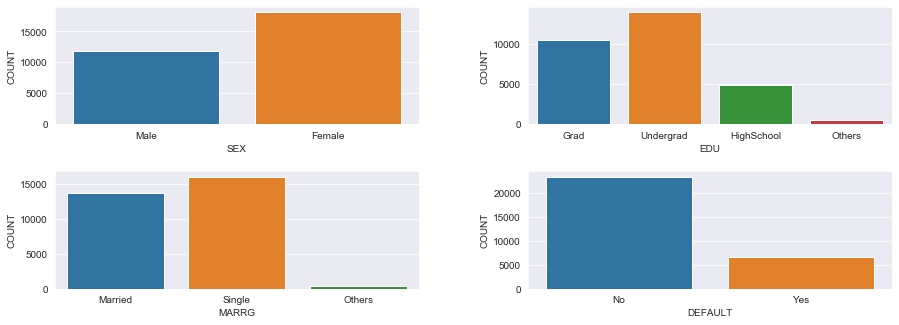

In [212]:
###1.2.3 data distrubution of the categorical attributes
#Draw countplot  
sns.set_style("darkgrid")
fig1, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(15,4))
df1=data_cln1.loc[:,['SEX','EDU','MARRG','DEFAULT']]
axes_1=[ax1, ax2, ax3,ax4]
SEX_label=['Male','Female']
EDU_label=['Grad','Undergrad','HighSchool','Others']
MARRG_label=['Married','Single','Others']
DEFAULT_label=['No','Yes']
xtick_labels_1=[SEX_label,EDU_label,MARRG_label,DEFAULT_label]
for i in range(0,4):
    sns.countplot(x=df1.columns[i],data=df1,ax=axes_1[i])
    xlbl=axes_1[i].get_xlabel()
    axes_1[i].set_xlabel(xlbl,fontsize=10)
    axes_1[i].set_ylabel('COUNT',fontsize=10)
    axes_1[i].set_xticklabels(xtick_labels_1[i])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.3)
plt.show()


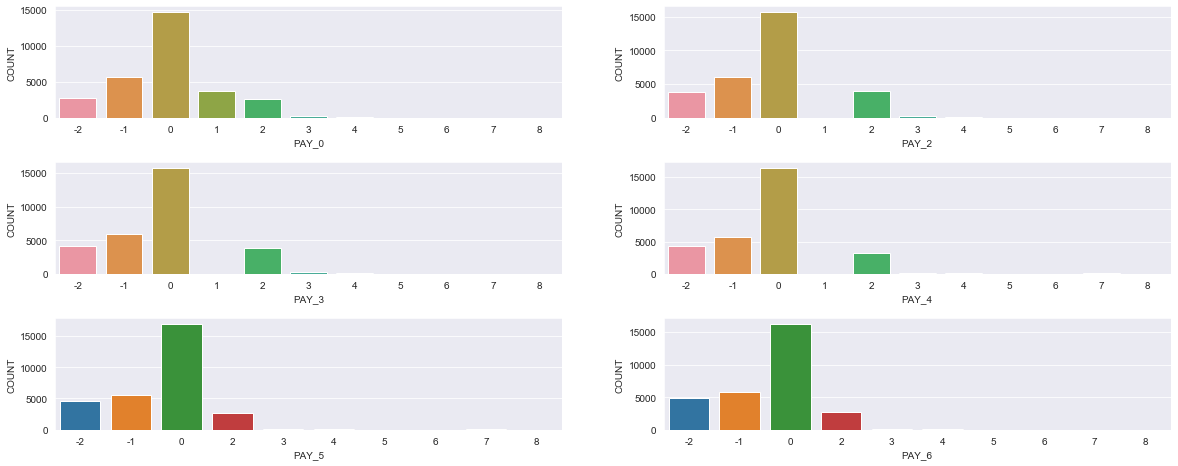

In [213]:
fig2, ((ax4, ax5),(ax6,ax7),(ax8,ax9)) = plt.subplots(nrows=3, ncols=2,figsize=(20,6))
df2=data_cln1[catcol].drop(['SEX','EDU','MARRG','DEFAULT'],1)
axes_2=[ax4,ax5,ax6,ax7,ax8,ax9]
for i in range(0,6):
    sns.countplot(x=df2.columns[i],data=df2,ax=axes_2[i])
    xlbl=axes_2[i].get_xlabel()
    axes_2[i].set_xlabel(xlbl,fontsize=10)
    axes_2[i].set_ylabel('COUNT',fontsize=10)
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.2)
plt.show()

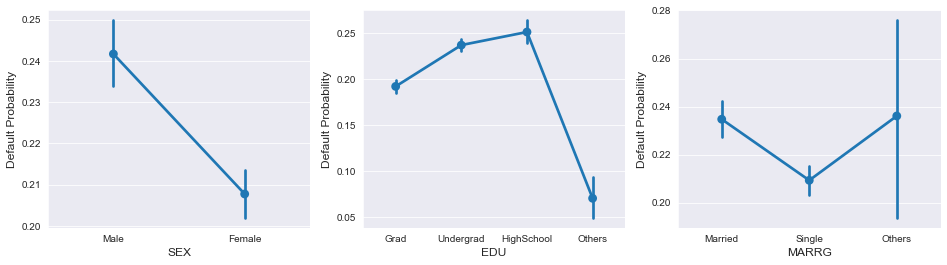

In [214]:
###1.2.4 relationship between class attribute and categorical attributes
####(1) one categorical attribute vs class attribute
fig1, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(16,4))
df1=data_cln1.loc[:,['SEX','EDU','MARRG','DEFAULT']]
axes1=[ax1,ax2,ax3]
xtick_labels1=[SEX_label,EDU_label,MARRG_label]
for i in range(0,3):
    b=sns.catplot(x=df1.columns[i],y='DEFAULT',data=df1, kind="point",
                    ax=axes1[i])
    axes1[i].set_ylabel('Default Probability',fontsize=12)
    xlbl=axes1[i].get_xlabel()
    axes1[i].set_xlabel(xlbl,fontsize=12)
    axes1[i].set_xticklabels(xtick_labels1[i])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.4)
for i in range(0,3):
    plt.close(i+2)
plt.show()

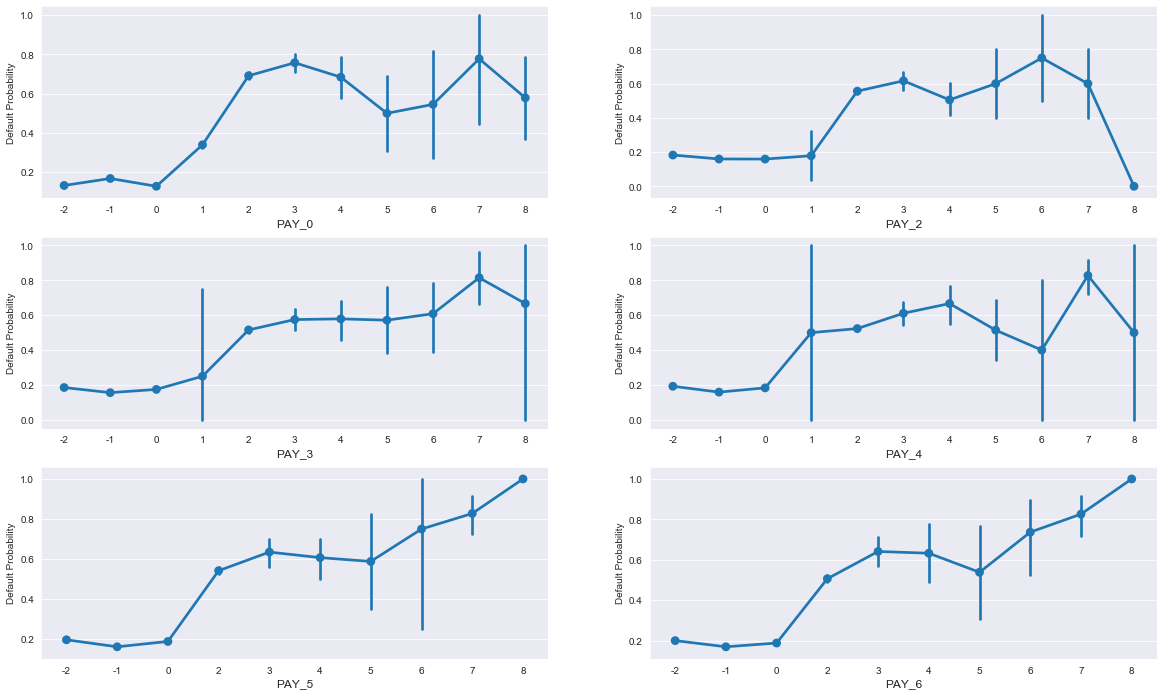

In [215]:

fig2, ((ax4, ax5),(ax6,ax7),(ax8,ax9)) = plt.subplots(nrows=3, ncols=2,figsize=(20,12))
df2=data_cln1[catcol].drop(['SEX','EDU','MARRG'],1)
axes2=[ax4,ax5,ax6,ax7,ax8,ax9]
for i in range(0,6):
    sns.catplot(x=df2.columns[i],y='DEFAULT',data=df2, kind="point",
                    ax=axes2[i])
    axes2[i].set(ylabel='Default Probability')
    xlbl=axes2[i].get_xlabel()
    axes2[i].set_xlabel(xlbl,fontsize=12)
for i in range(0,6):
    plt.close(i+2)
plt.show()

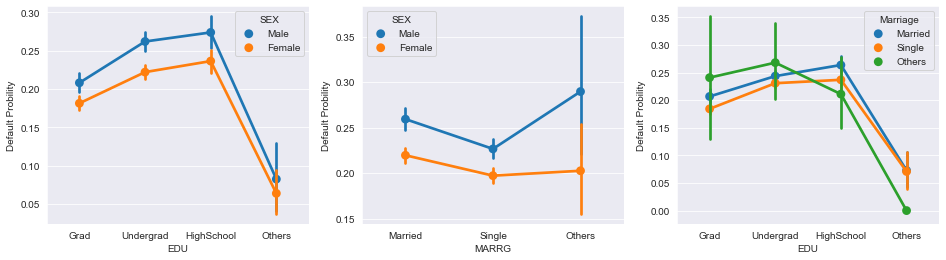

In [216]:
#####(2)two categorical attribute vs class attribute
###SEX,EDU vs Default
fig1,((ax1,ax2,ax3))=plt.subplots(nrows=1,ncols=3,figsize=(16,4))

Sex_Edu=sns.catplot(x='EDU',y='DEFAULT',hue='SEX',data=data_cln1, kind="point",ax=ax1)
ax1.set(ylabel='Default Probility')
ax1.set_xticklabels(EDU_label)
current_handles, current_labels=ax1.get_legend_handles_labels()
ax1.legend(current_handles,SEX_label,title="SEX")

Sex_Marrg=sns.catplot(x='MARRG',y='DEFAULT',hue='SEX',data=data_cln1, kind="point",ax=ax2)
ax2.set(ylabel='Default Probility')
ax2.set_xticklabels(MARRG_label)
current_handles, current_labels=ax2.get_legend_handles_labels()
ax2.legend(current_handles,SEX_label,title="SEX")

Marrg_Edu=sns.catplot(x='EDU',y='DEFAULT',hue='MARRG',data=data_cln1, kind="point",ax=ax3)
ax3.set(ylabel='Default Probility')
ax3.set_xticklabels(EDU_label)
current_handles, current_labels=ax3.get_legend_handles_labels()
ax3.legend(current_handles,MARRG_label,title="Marriage")

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.4)

for i in range(0,3):
    plt.close(i+2)
plt.show()

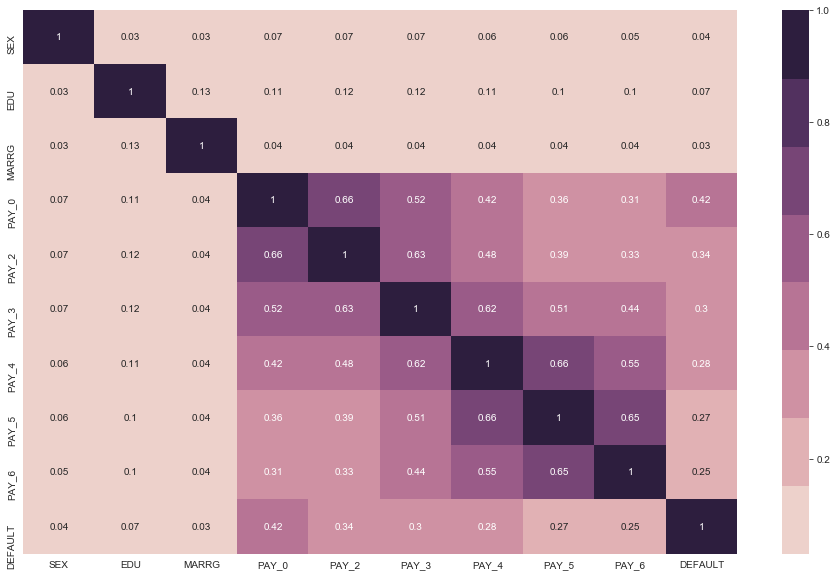

In [217]:
####(3)categorical attributes correlations
cat_df=data_cln1[catcol]
for col in catcol:
    cat_df[col]=cat_df[col].astype('category')
cat_df   
def cramers_v(x,y):
    confusion_matrix = pd.crosstab(x,y).values
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

corr_df = pd.DataFrame(index=catcol, columns=catcol)
corr_df= corr_df.fillna(0)
for col in cat_df.columns:
    for indx in cat_df.columns:
        corr_df.loc[indx,col]=cramers_v(cat_df[indx],cat_df[col]).round(2)
plt.figure(figsize=(16,10))
ax=sns.heatmap(corr_df,annot=True,cmap=sns.cubehelix_palette(8))
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) 

plt.show()

In [218]:
## 1.3 dealing with the numeric attributes
###1.3.1 check numeric attributes's values
data_cln1[numcol].describe()

,LMT_B,AGE,B_AMT1,B_AMT2,B_AMT3,B_AMT4,B_AMT5,B_AMT6,P_AMT1,P_AMT2,P_AMT3,P_AMT4,P_AMT5,P_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


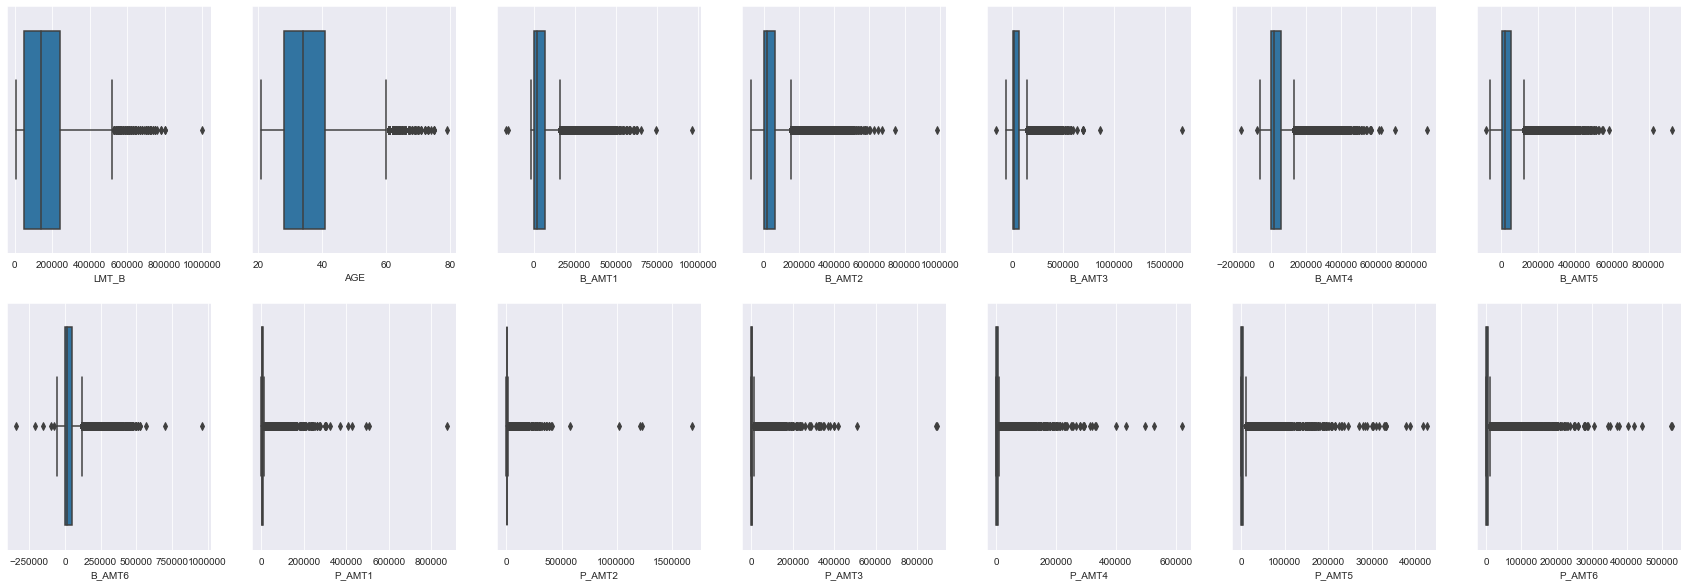

In [219]:
###1.3.2 boxplot of numeric attributes
fig, ((ax1, ax2,ax3,ax4,ax5,ax6,ax7),(ax8,ax9,ax10,ax11,ax12,ax13,ax14)) = plt.subplots(nrows=2, ncols=7,figsize=(30,10))
ax=[ax1, ax2, ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14]
for i in range(0,14):
    sns.boxplot(x=data_cln1[data_cln1[numcol].columns[i]],ax=ax[i])
plt.show()

In [220]:
###1.3.3 outliers detection (replace outliers values with median values).
def find_outliers(x):
    Q1=np.percentile(x,25)
    Q3=np.percentile(x,75)
    IQR=Q3-Q1
    L_OUT=Q1-1.5*IQR
    H_OUT=Q3+1.5*IQR
    indices=list(x.index[(x<L_OUT)|(x>H_OUT)])
    values=list(x[indices])
    return indices, values
Results=pd.DataFrame(columns=['min_out','max_out','number of out'],index=numcol)
for col in numcol:
        pos,outliers=find_outliers(data_cln1[col])
        num=len(outliers)
        Results.loc[col,:]=[min(outliers),max(outliers),num]   
Results

,min_out,max_out,number of out
LMT_B,530000,1000000,167
AGE,61,79,272
B_AMT1,-165580,964511,2400
B_AMT2,155635,983931,2395
B_AMT3,-157264,1664089,2469
B_AMT4,-170000,891586,2622
B_AMT5,-81334,927171,2725
B_AMT6,-339603,961664,2693
P_AMT1,11016,873552,2745
P_AMT2,11253,1684259,2714


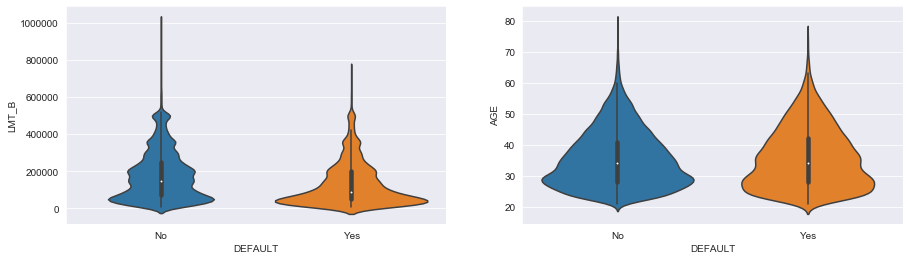

In [221]:
###1.3.4 relations between numeric attributes and class attribute
####(1) single numeric attribute vs class attribute
combo_attr=numcol[:]
combo_attr.append("DEFAULT")
combo_df=data_cln1[combo_attr]
df1=combo_df.loc[:,['LMT_B',"AGE","DEFAULT"]]

fig1,((ax1,ax2)) =plt.subplots(nrows=1, ncols=2,figsize=(15,4))
axes1=[ax1,ax2]
for i in range(0,2):
    p1=sns.violinplot(x='DEFAULT',y=df1.columns[i],data=df1,ax=axes1[i])   
    axes1[i].set_xticklabels(DEFAULT_label)



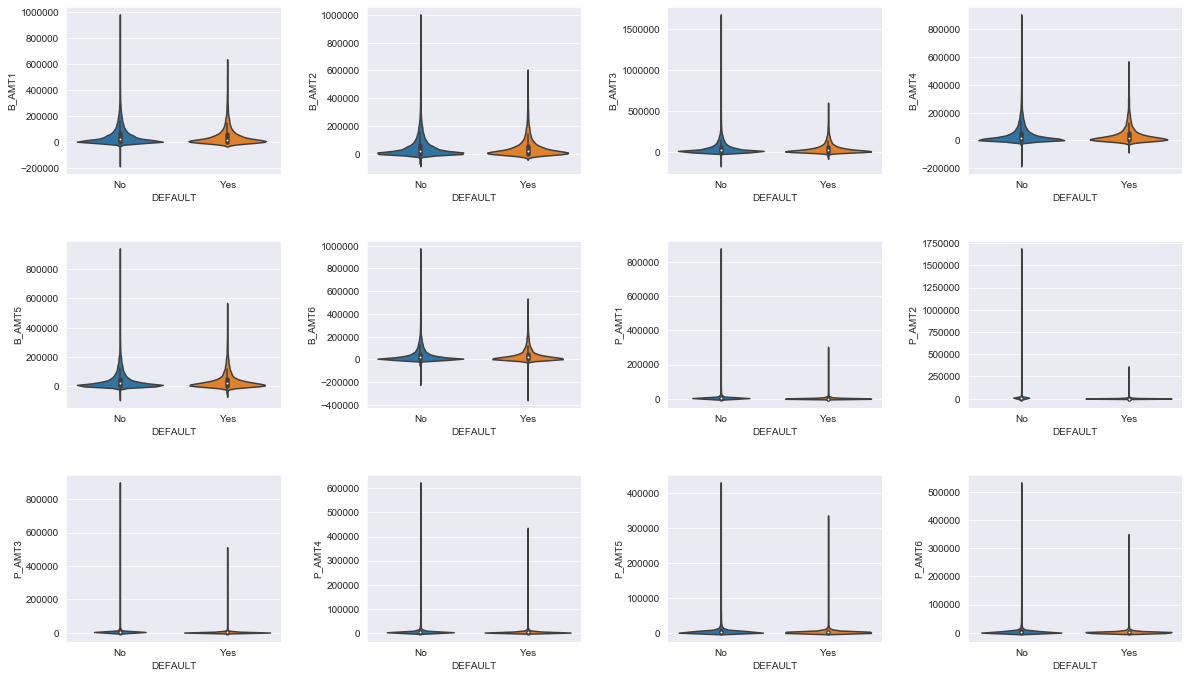

In [222]:
df2=combo_df.drop(['LMT_B',"AGE"],1)
fig2, ((ax3,ax4,ax5,ax6),(ax7,ax8,ax9,ax10),(ax11,ax12,ax13,ax14)) = plt.subplots(nrows=3, ncols=4,figsize=(20,9))
axes2=[ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14]
for i in range(0,12):
    p2=sns.violinplot(x='DEFAULT',y=df2.columns[i],data=df2,ax=axes2[i])
    axes2[i].set_xticklabels(DEFAULT_label)
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.4)   
plt.show()

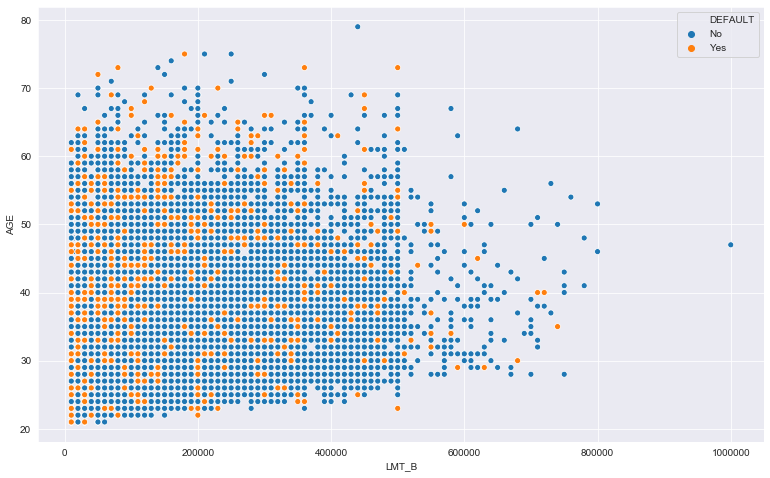

In [223]:
####(2) two numeric attributes vs class attribute
plt.figure(figsize=(13,8))
p=sns.scatterplot(x=df1['LMT_B'], y=df1['AGE'],hue=df1['DEFAULT'])
current_handles, current_labels=p.get_legend_handles_labels()
p.legend(current_handles,['DEFAULT', 'No', 'Yes'],loc='upper right',prop={'size': 10})
plt.show()

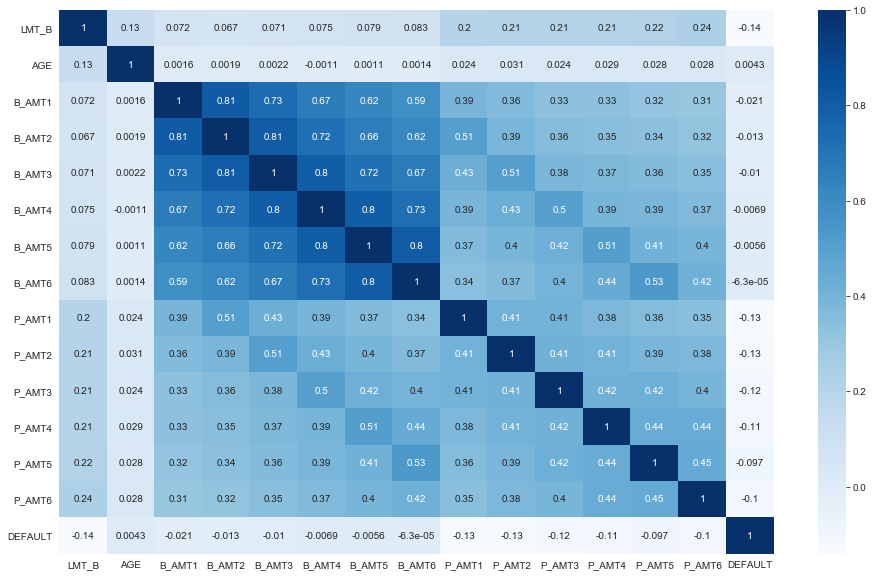

In [224]:
####(3) correlation between numeric attribues
corr_num=combo_df.corr(method ='kendall')
plt.figure(figsize=(16,10))
ax=sns.heatmap(corr_num,annot=True,cmap="Blues")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) 

plt.show()

In [225]:
#2 Feature Selections
##2.1 Data transformation
###2.1.1 get dummies 
DummyList=catcol[0:9]

df_dummy=data_cln1[:]

for x in DummyList:
    df_dummy[x]=df_dummy[x].astype("category")
    
df_dummy=pd.get_dummies(df_dummy)
df_dummy.head(10)

,LMT_B,AGE,B_AMT1,B_AMT2,B_AMT3,B_AMT4,B_AMT5,B_AMT6,P_AMT1,P_AMT2,P_AMT3,P_AMT4,P_AMT5,P_AMT6,DEFAULT,SEX_1,SEX_2,EDU_1,EDU_2,EDU_3,EDU_4,MARRG_1,MARRG_2,MARRG_3,PAY_0_-2,PAY_0_-1,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-2,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-2,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,50000,37,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,500000,29,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,100000,23,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,140000,28,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,20000,35,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [608]:
###2.1.2 Data Robust scaling
scaler=RobustScaler()
df_scale=df_dummy.copy(deep=True)
scale=pd.DataFrame(scaler.fit_transform(df_scale[numcol]),columns=df_scale[numcol].columns)
for x in numcol:
    df_scale[x]=scale[x]
df_scale.head(10)

,LMT_B,AGE,B_AMT1,B_AMT2,B_AMT3,B_AMT4,B_AMT5,B_AMT6,P_AMT1,P_AMT2,P_AMT3,P_AMT4,P_AMT5,P_AMT6,DEFAULT,SEX_1,SEX_2,EDU_1,EDU_2,EDU_3,EDU_4,MARRG_1,MARRG_2,MARRG_3,PAY_0_-2,PAY_0_-1,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-2,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-2,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,-0.631579,-0.769231,-0.290695,-0.296584,-0.337391,-0.365126,-0.373848,-0.356074,-0.524214,-0.316775,-0.437424,-0.403524,-0.396930,-0.386374,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,-0.105263,-0.615385,-0.310071,-0.319150,-0.302730,-0.302419,-0.302504,-0.288055,-0.524214,-0.242141,-0.194411,-0.134508,-0.396930,0.128791,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,-0.263158,0.000000,0.107937,-0.117549,-0.113559,-0.090477,-0.065180,-0.031747,-0.145282,-0.122150,-0.194411,-0.134508,-0.132310,0.901539,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,-0.473684,0.230769,0.387339,0.443008,0.507883,0.177504,0.224139,0.260230,-0.024963,0.002400,-0.145808,-0.107606,-0.114051,-0.128791,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,-0.473684,1.769231,-0.216654,-0.254500,0.273859,0.036183,0.021506,0.042968,-0.024963,8.320614,1.992710,2.017621,-0.214607,-0.211475,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,-0.473684,0.230769,0.661373,0.587809,0.652530,0.006554,0.031274,0.061595,0.099850,-0.046556,-0.277764,-0.134508,-0.132310,-0.180308,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,1.894737,-0.384615,5.439497,6.404677,7.390080,10.034659,9.599886,9.529653,13.205192,9.117111,8.797084,5.041092,3.241598,3.160538,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,-0.210526,-0.846154,-0.165357,-0.341191,-0.338922,-0.360891,-0.377131,-0.344248,-0.429356,-0.337893,-0.437424,-0.247226,0.049484,0.010818,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,0.000000,-0.461538,-0.174659,-0.116418,-0.138795,-0.131106,-0.130329,-0.278502,0.306790,-0.482121,-0.332442,-0.134508,-0.132310,-0.128791,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,-0.631579,0.076923,-0.352286,-0.347419,-0.349374,-0.365126,-0.105260,-0.065892,-0.524214,-0.482121,-0.437424,3.095568,-0.100026,-0.386374,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [227]:
##2.2 Feature-Selection models

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.4, random_state=0)
X_df=df_scale.drop("DEFAULT",1)
X=X_df.values
y_df=df_scale["DEFAULT"]
y=y_df.values

col_names=X_df.columns

def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks))


In [228]:
####2.2.1 Models choosen
ridgeCV=RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])

lassoCV=LassoCV(cv=5,random_state=0)

larsCV=LarsCV(cv=5)

lalaIC=LassoLarsIC(criterion='bic')

bayeRdg=BayesianRidge()

rfe = RFE(LogisticRegression(),n_features_to_select=5)

adboost = AdaBoostRegressor(random_state=0)

et = ExtraTreesRegressor(random_state=0)

rf = RandomForestRegressor(random_state=0)

gb=GradientBoostingRegressor(random_state=0)

models=[ridgeCV,lassoCV,larsCV,lalaIC,bayeRdg,rfe,adboost,et,rf,gb]
models_names=['ridgeCV','lassoCV','larsCV','lalaIC','bayeRdg','rfe','adboost','et','rf','gb']



In [229]:
####2.2.2 Feature Selection Model building
avg_scores = []
ranks = {}

for i in range(10): 
    scores=[]
    coefs=[]
    for train_index,test_index in sss.split(X,y):
        x_train = X_df.iloc[train_index]
        x_test = X_df.iloc[test_index]
        y_train = y_df.iloc[train_index]
        y_test = y_df.iloc[test_index] 
        Model=models[i].fit(x_train,y_train)
        scores.append(Model.score(x_test,y_test))
        if i<5:
            coefs.append(np.abs(Model.coef_))
        elif i==5:
            coefs.append(np.abs(Model.ranking_))
        elif i>5:
            coefs.append(np.abs(Model.feature_importances_))
    avg_score=np.mean(scores)
    if i == 5:
        ranks[models_names[i]] = rank_to_dict(pd.DataFrame(coefs).mean().values,col_names,order=-1)
    else:
        ranks[models_names[i]] = rank_to_dict(pd.DataFrame(coefs).mean().values,col_names,order=1)
    avg_scores.append(avg_score)

In [230]:
###2.2.4 Feature selection results
pd.set_option('display.max.rows', 600)

results=pd.DataFrame.from_dict(ranks)
avg_scores

[0.2069853082923648,
 0.2078538209137414,
 0.2068158995626883,
 0.2029606098422044,
 0.20799734493214528,
 0.8200416666666666,
 0.16917976310095195,
 0.05260044326751519,
 0.11080269665100115,
 0.21998140567008234]

In [231]:
adj_r=results.copy(deep=True)
for i in range(10):
    adj_r.iloc[:,i]=(adj_r.iloc[:,i]*avg_scores[i])/np.sum(avg_scores)*10

In [281]:
#Feature Ranks
adj=adj_r.copy(deep=True)
adj['MeanScore']=adj_r.mean(axis=1)
Feature_Ranks=adj.sort_values('MeanScore',ascending= False)
Feature_Ranks.iloc[np.r_[0:5, -5:0]]

,ridgeCV,lassoCV,larsCV,lalaIC,bayeRdg,rfe,adboost,et,rf,gb,MeanScore
PAY_0_2,0.740088,0.864178,0.859863,0.843834,0.864775,3.409426,0.703386,0.218693,0.460676,0.914600,0.987952
PAY_0_3,0.765905,0.855537,0.825469,0.767889,0.786945,3.409426,0.035169,0.010935,0.023034,0.054876,0.753518
PAY_0_0,0.740088,0.613567,0.154775,0.118137,0.804241,3.307143,0.000000,0.006561,0.004607,0.009146,0.575826
PAY_0_4,0.499129,0.371597,0.524516,0.413479,0.345910,3.307143,0.000000,0.000000,0.000000,0.009146,0.547092
PAY_0_-2,0.662637,0.527149,0.077388,0.016877,0.691820,3.273049,0.000000,0.002187,0.009214,0.009146,0.526947
B_AMT5,0.017211,0.008642,0.000000,0.000000,0.017296,0.170471,0.000000,0.061234,0.152023,0.009146,0.043602
P_AMT6,0.000000,0.000000,0.000000,0.000000,0.000000,0.102283,0.000000,0.078729,0.193484,0.027438,0.040193
P_AMT3,0.000000,0.000000,0.000000,0.000000,0.000000,0.068189,0.035169,0.067795,0.184270,0.045730,0.040115
P_AMT5,0.000000,0.000000,0.000000,0.000000,0.000000,0.102283,0.007034,0.069982,0.170450,0.018292,0.036804
P_AMT4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007034,0.063421,0.165843,0.018292,0.025459


In [785]:
Feature_Ranks.loc[Feature_Ranks['MeanScore']<0.2,:].index

Index(['EDU_2', 'EDU_1', 'EDU_3', 'PAY_6_7', 'PAY_5_0', 'SEX_2', 'PAY_5_3',
       'PAY_6_-2', 'PAY_3_4', 'MARRG_2', 'PAY_6_4', 'PAY_6_2', 'PAY_4_-1',
       'PAY_3_0', 'PAY_3_1', 'PAY_3_8', 'PAY_5_-2', 'B_AMT2', 'PAY_2_8',
       'B_AMT1', 'PAY_4_-2', 'PAY_5_6', 'P_AMT1', 'AGE', 'PAY_4_0', 'PAY_5_8',
       'MARRG_3', 'PAY_2_-2', 'PAY_2_0', 'B_AMT6', 'B_AMT3', 'P_AMT2',
       'MARRG_1', 'B_AMT4', 'SEX_1', 'B_AMT5', 'P_AMT6', 'P_AMT3', 'P_AMT5',
       'P_AMT4'],
      dtype='object')

In [289]:
###2.2.5 Feature selected data 
####(1)selection threshold is MeanScore>0.1
Fs_df1=df_scale.loc[:,Feature_Ranks.loc[Feature_Ranks['MeanScore']>=0.1,:].index]
Fs_df1["DEFAULT"]=df_scale["DEFAULT"]
####(2)selection thresold is MeanScore>0.2
Fs_df2=df_scale.loc[:,Feature_Ranks.loc[Feature_Ranks['MeanScore']>=0.2,:].index]
Fs_df2["DEFAULT"]=df_scale["DEFAULT"]
####(3)Dataset without Feature selection
NoFs_df=df_scale

### check data structure
print(len(Fs_df2.columns),len(NoFs_df.columns))

48 88


In [233]:
####export dataframes
NoFs_df.to_csv('/Users/jingjingsun/Desktop/df.csv')
Fs_df1.to_csv('/Users/jingjingsun/Desktop/df1.csv')
Fs_df2.to_csv('/Users/jingjingsun/Desktop/df2.csv')

In [487]:
#3. Classification
##3.1 Naive Bayes algorithm
Naive=pd.read_csv("/Users/jingjingsun/Desktop/nb_final.csv")
Naive=Naive.drop(Naive.columns[0],1)
Naive

,methods,OutLoop_No,Accuracy,Recall,F1,AUC,Acc_BestTune1,Acc_BestTune2,Acc_BestTune3,ROC_BestTune1,ROC_BestTune2,ROC_BestTune3
0,T88_NaiveBayes,1,0.796667,0.155991,0.253366,0.727296,0,False,1,0,False,1
1,T88_NaiveBayes,2,0.797167,0.152223,0.249229,0.726275,0,False,1,0,False,1
2,T88_NaiveBayes,3,0.796500,0.155237,0.252296,0.724446,0,False,1,0,False,1
3,T88_NaiveBayes,4,0.805333,0.242653,0.355408,0.726036,0,False,1,0,False,1
4,T88_NaiveBayes,5,0.802167,0.208742,0.318208,0.726757,0,False,1,0,False,1
5,T48_NaiveBayes,1,0.798500,0.164280,0.265046,0.754865,0,False,1,0,True,1
6,T48_NaiveBayes,2,0.799833,0.165787,0.268129,0.755033,0,False,1,0,True,1
7,T48_NaiveBayes,3,0.799333,0.166541,0.268530,0.753777,0,False,1,0,True,1
8,T48_NaiveBayes,4,0.801167,0.184627,0.291147,0.723327,0,False,1,0,False,1
9,T48_NaiveBayes,5,0.800500,0.182366,0.287924,0.723653,0,False,1,0,False,1


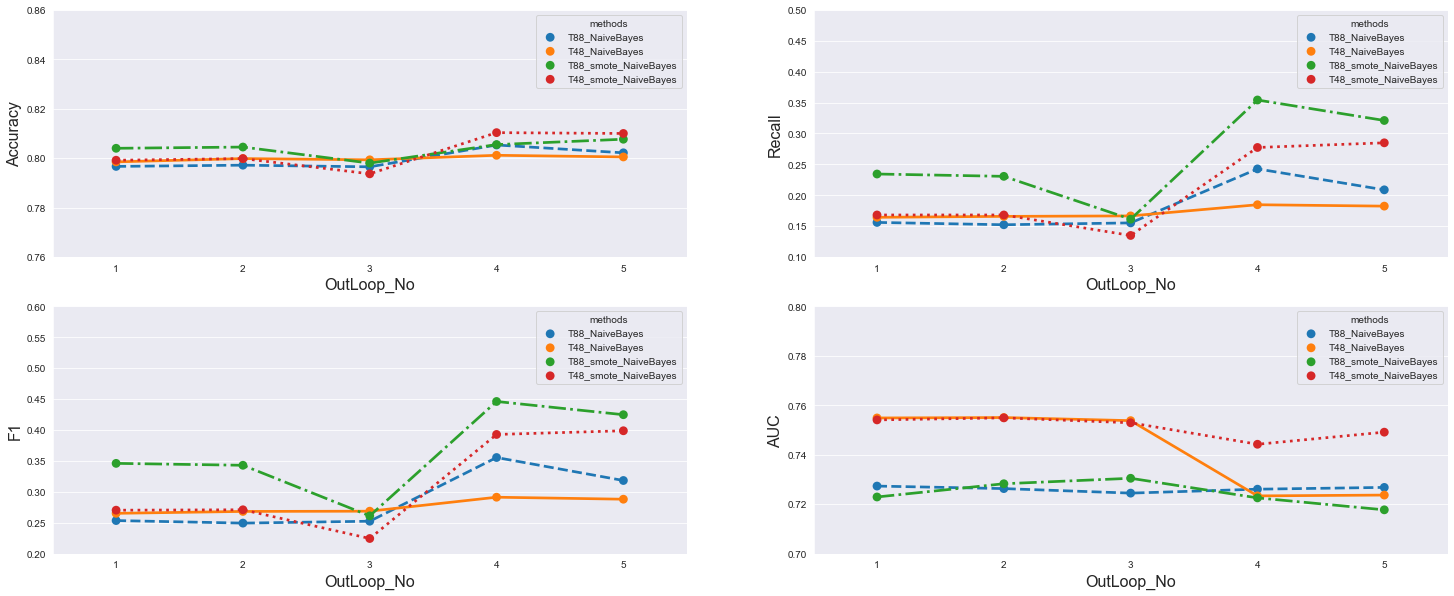

In [489]:
fig, ((axe1, axe2),(axe3,axe4)) = plt.subplots(nrows=2, ncols=2,figsize=(25,10))
axen=[axe1,axe2,axe3,axe4,axe5,axe6,axe7,axe8,axe9,axe10]
linestyles=['--','-','-.',':']
for i in range(0,4):
    sns.catplot(x='OutLoop_No',y=Naive.columns[i+2],hue='methods',data=Naive,kind="point",ax=axen[i],height=15,linestyles=linestyles)
    axen[i].set_ylabel(Naive.columns[i+2],fontsize=16)
    axen[i].set_xlabel("OutLoop_No",fontsize=16)
    axe1.set_ylim([0.76,0.86])
    axe2.set_ylim([0.10,0.50])
    axe3.set_ylim([0.20,0.60])
    axe4.set_ylim([0.70,0.80])
for i in range(0,4):
    plt.close(i+2)
plt.show()

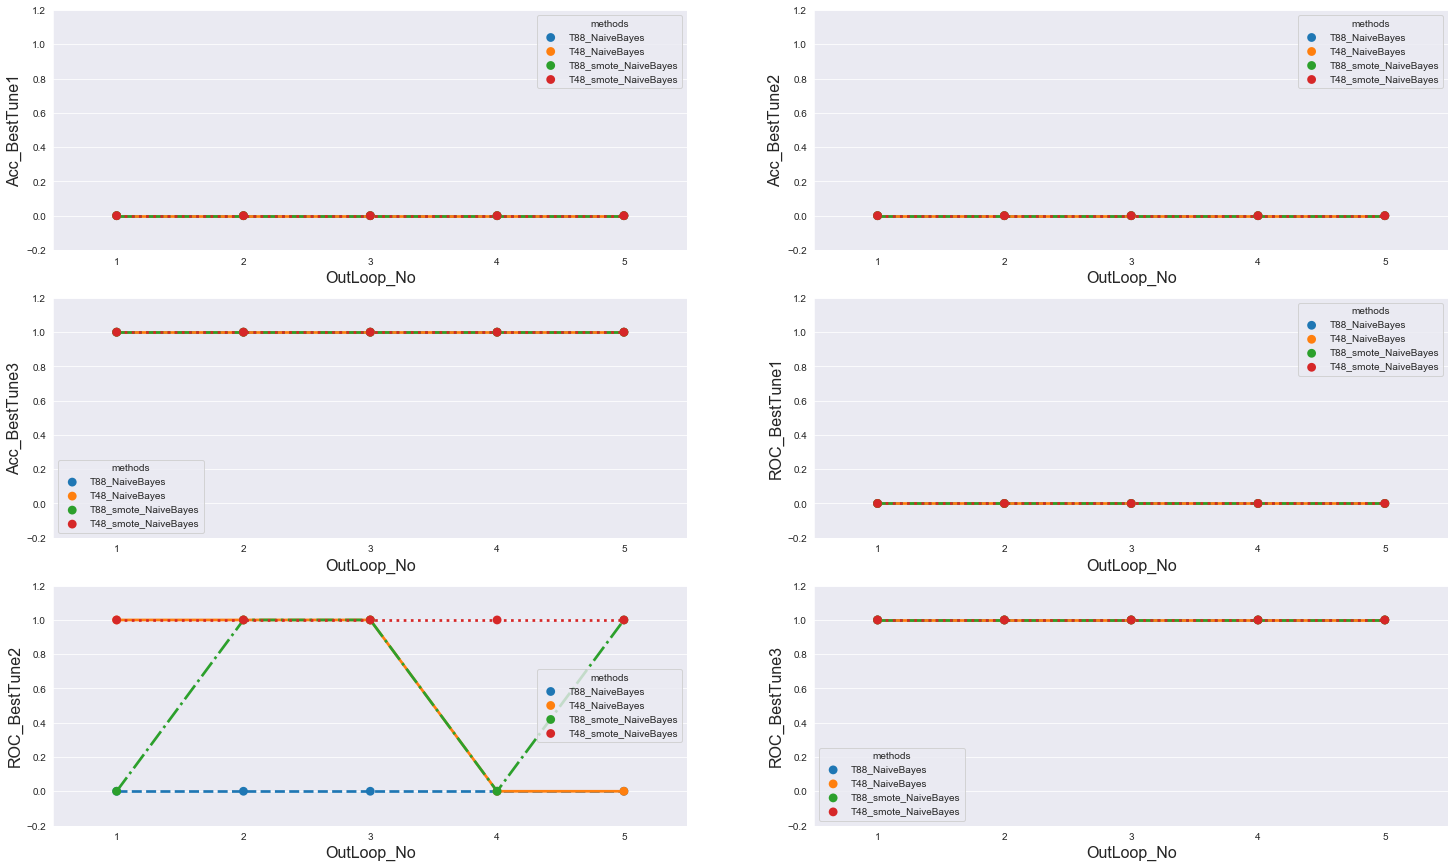

In [490]:
fig, ((axe5,axe6),(axe7,axe8),(axe9,axe10)) = plt.subplots(nrows=3, ncols=2,figsize=(25,15))
axen=[axe5,axe6,axe7,axe8,axe9,axe10]
linestyles=['--','-','-.',':']
for i in range(0,6):
    sns.catplot(x='OutLoop_No',y=Naive.columns[i+6],hue='methods',data=Naive,kind="point",ax=axen[i],height=10,linestyles=linestyles)
    axen[i].set_ylabel(Naive.columns[i+6],fontsize=16)
    axen[i].set_xlabel("OutLoop_No",fontsize=16)
    axe5.set_ylim([-0.2,1.2])
    axe6.set_ylim([-0.2,1.2])
    axe7.set_ylim([-0.2,1.2])
    axe8.set_ylim([-0.2,1.2])
    axe9.set_ylim([-0.2,1.2])
    axe10.set_ylim([-0.2,1.2])
for i in range(0,6):
    plt.close(i+2)
plt.show()

In [491]:
##metrics median for each methods
df4=Naive.drop(Naive.columns[[6,7]],1)
methods=df4.methods.unique()
colnames=df4.columns[range(2,6)]
Results4=pd.DataFrame(columns=colnames,index=methods)

for md in methods:
    for col in colnames:
        Results4.loc[md,col]=df4.loc[df4.iloc[:,0]==md,col].median()
Results4.columns=['Median_Acc',"Median_Recall","Median_F1","Median_AUC"]
Results4


,Median_Acc,Median_Recall,Median_F1,Median_AUC
T88_NaiveBayes,0.797167,0.155991,0.253366,0.726275
T48_NaiveBayes,0.799833,0.166541,0.26853,0.753777
T88_smote_NaiveBayes,0.8045,0.234363,0.34594,0.722883
T48_smote_NaiveBayes,0.799833,0.168048,0.270795,0.75291


In [492]:
#### caculate the distance from each loops data to median values
df4_med=df4.iloc[:,range(6)]
df4_med['Acc_dist']=0
df4_med['Recall_dist']=0
df4_med['F1_dist']=0
df4_med['Roc_dist']=0
df4_med['dist']=0
for ind in Results4.index:
    df4_med.loc[df4_med.methods==ind,'Acc_dist']=df4_med.loc[df4_med.methods==ind,'Accuracy']-Results4.loc[ind,'Median_Acc']
    df4_med.loc[df4_med.methods==ind,'Recall_dist']=df4_med.loc[df4_med.methods==ind,'Recall']-Results4.loc[ind,'Median_Recall']
    df4_med.loc[df4_med.methods==ind,'F1_dist']=df4_med.loc[df4_med.methods==ind,'F1']-Results4.loc[ind,'Median_F1']
    df4_med.loc[df4_med.methods==ind,'Roc_dist']=df4_med.loc[df4_med.methods==ind,'AUC']-Results4.loc[ind,'Median_AUC']
for i in range(20):
    df4_med.iloc[i,10]=math.sqrt(df4_med.iloc[i,6]**2+df4_med.iloc[i,7]**2+df4_med.iloc[i,8]**2+df4_med.iloc[i,9]**2)
                                                
df4_med

,methods,OutLoop_No,Accuracy,Recall,F1,AUC,Acc_dist,Recall_dist,F1_dist,Roc_dist,dist
0,T88_NaiveBayes,1,0.796667,0.155991,0.253366,0.727296,-0.000500,0.000000,0.000000,0.001021,0.001137
1,T88_NaiveBayes,2,0.797167,0.152223,0.249229,0.726275,0.000000,-0.003768,-0.004137,0.000000,0.005596
2,T88_NaiveBayes,3,0.796500,0.155237,0.252296,0.724446,-0.000667,-0.000754,-0.001070,-0.001829,0.002346
3,T88_NaiveBayes,4,0.805333,0.242653,0.355408,0.726036,0.008167,0.086662,0.102042,-0.000239,0.134125
4,T88_NaiveBayes,5,0.802167,0.208742,0.318208,0.726757,0.005000,0.052751,0.064842,0.000482,0.083740
5,T48_NaiveBayes,1,0.798500,0.164280,0.265046,0.754865,-0.001333,-0.002261,-0.003484,0.001088,0.004496
6,T48_NaiveBayes,2,0.799833,0.165787,0.268129,0.755033,0.000000,-0.000754,-0.000401,0.001256,0.001518
7,T48_NaiveBayes,3,0.799333,0.166541,0.268530,0.753777,-0.000500,0.000000,0.000000,0.000000,0.000500
8,T48_NaiveBayes,4,0.801167,0.184627,0.291147,0.723327,0.001333,0.018086,0.022617,-0.030450,0.042043
9,T48_NaiveBayes,5,0.800500,0.182366,0.287924,0.723653,0.000667,0.015825,0.019394,-0.030124,0.039172


In [493]:
df4_Results=Results4.copy(deep=True)
df4_Results.columns=['Accuracy','Recall','F1','AUC']
df4_Results['OutLoop_No']=0
df4_Results.loc["T88_NaiveBayes",:]=df4_med.iloc[df4_med.loc[df4_med.methods=="T88_NaiveBayes",'dist'].idxmin(),range(1,6)]
df4_Results.loc["T48_NaiveBayes",:]=df4_med.iloc[df4_med.loc[df4_med.methods=="T48_NaiveBayes",'dist'].idxmin(),range(1,6)]
df4_Results.loc["T88_smote_NaiveBayes",:]=df4_med.iloc[df4_med.loc[df4_med.methods=="T88_smote_NaiveBayes",'dist'].idxmin(),range(1,6)]
df4_Results.loc["T48_smote_NaiveBayes",:]=df4_med.iloc[df4_med.loc[df4_med.methods=="T48_smote_NaiveBayes",'dist'].idxmin(),range(1,6)]
df4_Results

,Accuracy,Recall,F1,AUC,OutLoop_No
T88_NaiveBayes,0.796667,0.155991,0.253366,0.727296,1
T48_NaiveBayes,0.799333,0.166541,0.26853,0.753777,3
T88_smote_NaiveBayes,0.804,0.234363,0.34594,0.722883,1
T48_smote_NaiveBayes,0.799167,0.168048,0.270139,0.754076,1


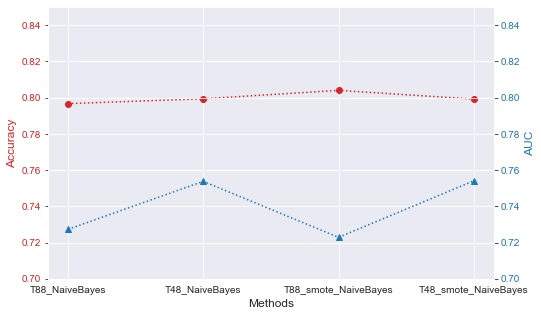

In [494]:
df4_Results['methods']=df4_Results.index


fig, ax1= plt.subplots(figsize=(8,5))
color = 'tab:red'
ax1.set_xlabel('methods')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(df4_Results.loc[:,'methods'], df4_Results.loc[:,'Accuracy'],marker='o', color=color,label="Acurracy", linestyle=":")
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0.70,0.85])
ax1.set_ylabel('Accuracy',fontsize=12)
ax1.set_xlabel('Methods',fontsize=12)


ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('AUC', color=color)  
ax2.plot(df4_Results.loc[:,'methods'], df4_Results.loc[:,'AUC'], marker='^',color=color,label="AUC", linestyle=":")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0.70,0.85])
ax2.set_ylabel('AUC',fontsize=12)

plt.show()


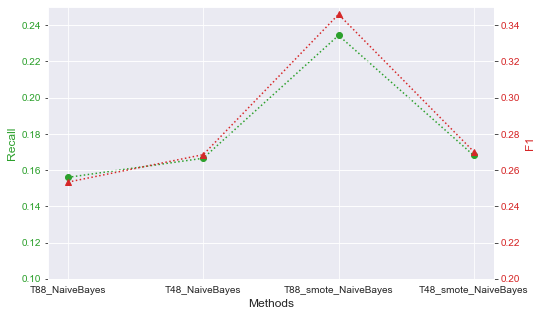

In [495]:
fig, ax3= plt.subplots(figsize=(8,5))

color = 'tab:green'
ax3.set_xlabel('methods')
ax3.set_ylabel('Recall', color=color)
ax3.plot(df4_Results.loc[:,'methods'], df4_Results.loc[:,'Recall'],marker='o', color=color,label="Recall", linestyle=":")
ax3.tick_params(axis='y', labelcolor=color)
ax3.set_ylim([0.10,0.25])
ax3.set_ylabel('Recall',fontsize=12)
ax3.set_xlabel('Methods',fontsize=12)


ax4 = ax3.twinx()  

color = 'tab:red'
ax4.set_ylabel('F1', color=color)  
ax4.plot(df4_Results.loc[:,'methods'], df4_Results.loc[:,'F1'], marker='^',color=color,label="F1", linestyle=":")
ax4.tick_params(axis='y', labelcolor=color)
ax4.set_ylim([0.20,0.35])
ax4.set_ylabel('F1',fontsize=12)

plt.show()

#we choose T48_smote_NaiveBayes as our model. this model is stable and the metric values are good

In [503]:
####hyperparameters for selected model
Naive.loc[(Naive.methods=='T48_smote_NaiveBayes')&(Naive.OutLoop_No==1),Naive.columns[range(6,12)]]

,Acc_BestTune1,Acc_BestTune2,Acc_BestTune3,ROC_BestTune1,ROC_BestTune2,ROC_BestTune3
15,0,False,1,0,True,1


In [524]:
##3.2 CART algorithm (Recursive Partitioning And Regression Trees)
CART=pd.read_csv("/Users/jingjingsun/Desktop/rp_final.csv")
CART=CART.drop(CART.columns[0],1)
CART

,methods,OutLoop_No,Accuracy,Recall,F1,AUC,Acc_BestTune,ROC_BestTune
0,T88_rpart,1,0.820000,0.321025,0.440994,0.681864,0.003203,0.003203
1,T88_rpart,2,0.821000,0.342125,0.458123,0.682055,0.003014,0.003014
2,T88_rpart,3,0.819000,0.337604,0.452069,0.681981,0.003014,0.003014
3,T88_rpart,4,0.821000,0.322532,0.443523,0.693427,0.001695,0.001695
4,T88_rpart,5,0.816500,0.302939,0.422047,0.681044,0.002731,0.002731
5,T48_rpart,1,0.820167,0.331575,0.449209,0.682023,0.002826,0.002826
6,T48_rpart,2,0.822500,0.372268,0.481247,0.693198,0.003390,0.003390
7,T48_rpart,3,0.821333,0.324039,0.445135,0.693388,0.003390,0.003390
8,T48_rpart,4,0.821333,0.324039,0.445135,0.692686,0.001821,0.002825
9,T48_rpart,5,0.819500,0.325546,0.443760,0.702250,0.002637,0.002637


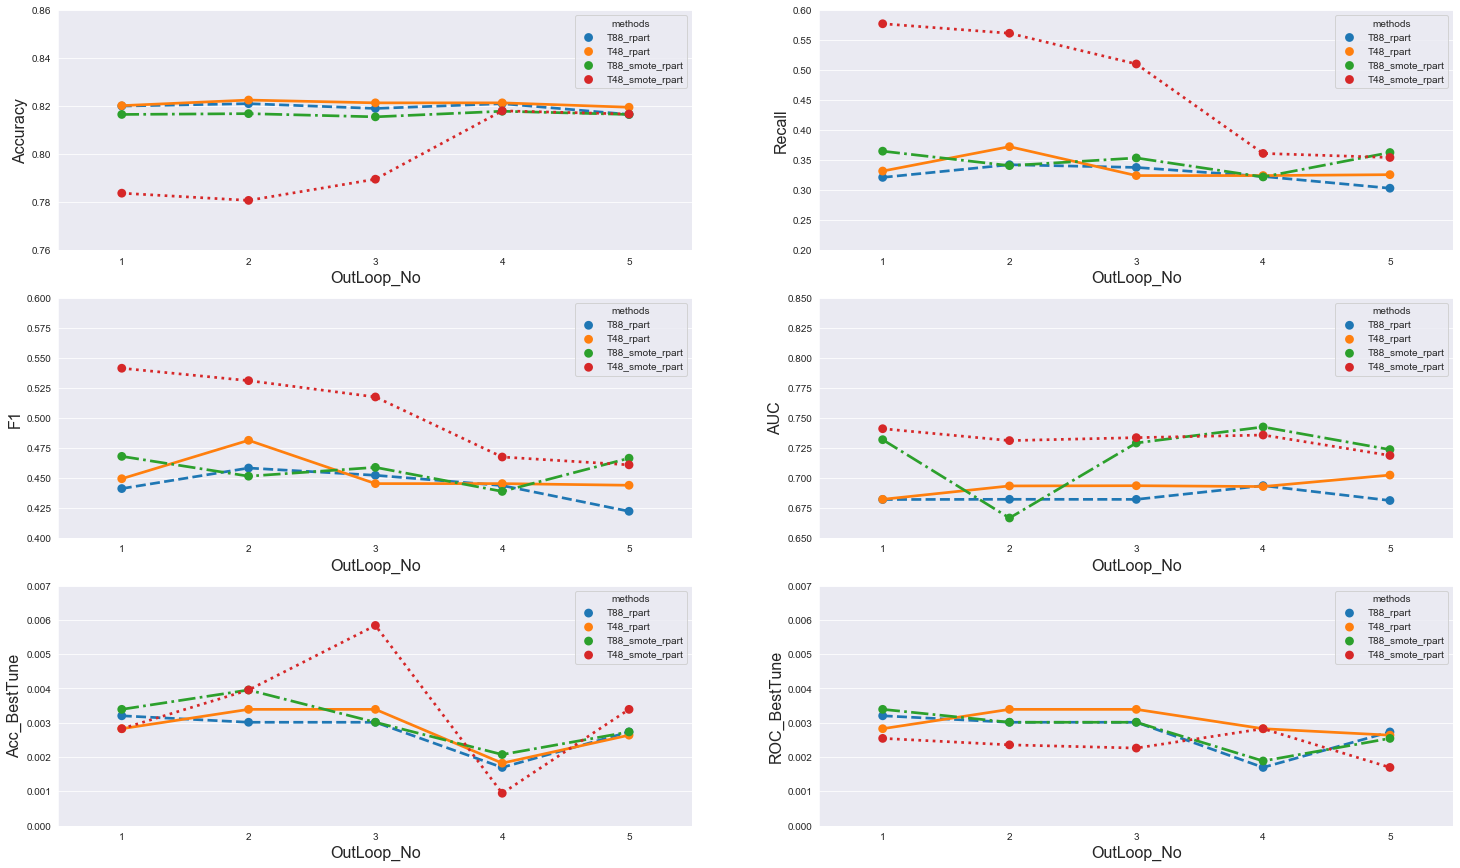

In [525]:
fig, ((axe1, axe2),(axe3,axe4),(axe5,axe6)) = plt.subplots(nrows=3, ncols=2,figsize=(25,15))
axen=[axe1,axe2,axe3,axe4,axe5,axe6]
linestyles=['--','-','-.',':']
for i in range(0,6):
    sns.catplot(x='OutLoop_No',y=CART.columns[i+2],hue='methods',data=CART,kind="point",ax=axen[i],height=10,linestyles=linestyles)
    axen[i].set_ylabel(CART.columns[i+2],fontsize=16)
    axen[i].set_xlabel("OutLoop_No",fontsize=16)
    axe1.set_ylim([0.76,0.86])
    axe2.set_ylim([0.2,0.60])
    axe3.set_ylim([0.40,0.60])
    axe4.set_ylim([0.65,0.85])
    axe5.set_ylim([0,0.007])
    axe6.set_ylim([0,0.007])
for i in range(0,6):
    plt.close(i+2)
plt.show()

In [526]:
##metrics median for each methods
df1=CART.drop(CART.columns[[6,7]],1)
methods=df1.methods.unique()
colnames=df1.columns[range(2,6)]
Results1=pd.DataFrame(columns=colnames,index=methods)

for md in methods:
    for col in colnames:
        Results1.loc[md,col]=df1.loc[df1.iloc[:,0]==md,col].median()
Results1.columns=['Median_Acc',"Median_Recall","Median_F1","Median_AUC"]      
Results1

,Median_Acc,Median_Recall,Median_F1,Median_AUC
T88_rpart,0.82,0.322532,0.443523,0.681981
T48_rpart,0.821333,0.325546,0.445135,0.693198
T88_smote_rpart,0.8165,0.353429,0.45868,0.729019
T48_smote_rpart,0.7895,0.510173,0.517386,0.733466


In [527]:
#### caculate the distance from each loops data to median values
df1_med=df1.iloc[:,range(6)]
df1_med['Acc_dist']=0
df1_med['Recall_dist']=0
df1_med['F1_dist']=0
df1_med['Roc_dist']=0
df1_med['dist']=0
for ind in Results1.index:
    df1_med.loc[df1_med.methods==ind,'Acc_dist']=df1_med.loc[df1_med.methods==ind,'Accuracy']-Results1.loc[ind,'Median_Acc']
    df1_med.loc[df1_med.methods==ind,'Recall_dist']=df1_med.loc[df1_med.methods==ind,'Recall']-Results1.loc[ind,'Median_Recall']
    df1_med.loc[df1_med.methods==ind,'F1_dist']=df1_med.loc[df1_med.methods==ind,'F1']-Results1.loc[ind,'Median_F1']
    df1_med.loc[df1_med.methods==ind,'Roc_dist']=df1_med.loc[df1_med.methods==ind,'AUC']-Results1.loc[ind,'Median_AUC']
for i in range(20):
    df1_med.iloc[i,10]=math.sqrt(df1_med.iloc[i,6]**2+df1_med.iloc[i,7]**2+df1_med.iloc[i,8]**2+df1_med.iloc[i,9]**2)
                                                
df1_med

,methods,OutLoop_No,Accuracy,Recall,F1,AUC,Acc_dist,Recall_dist,F1_dist,Roc_dist,dist
0,T88_rpart,1,0.820000,0.321025,0.440994,0.681864,0.000000,-0.001507,-0.002530,-0.000117,0.002947
1,T88_rpart,2,0.821000,0.342125,0.458123,0.682055,0.001000,0.019593,0.014600,0.000074,0.024455
2,T88_rpart,3,0.819000,0.337604,0.452069,0.681981,-0.001000,0.015072,0.008545,0.000000,0.017354
3,T88_rpart,4,0.821000,0.322532,0.443523,0.693427,0.001000,0.000000,0.000000,0.011447,0.011490
4,T88_rpart,5,0.816500,0.302939,0.422047,0.681044,-0.003500,-0.019593,-0.021476,-0.000936,0.029296
5,T48_rpart,1,0.820167,0.331575,0.449209,0.682023,-0.001167,0.006029,0.004074,-0.011175,0.013386
6,T48_rpart,2,0.822500,0.372268,0.481247,0.693198,0.001167,0.046722,0.036112,0.000000,0.059063
7,T48_rpart,3,0.821333,0.324039,0.445135,0.693388,0.000000,-0.001507,0.000000,0.000190,0.001519
8,T48_rpart,4,0.821333,0.324039,0.445135,0.692686,0.000000,-0.001507,0.000000,-0.000511,0.001592
9,T48_rpart,5,0.819500,0.325546,0.443760,0.702250,-0.001833,0.000000,-0.001375,0.009052,0.009338


In [529]:
df1_Results=Results1.copy(deep=True)
df1_Results.columns=['Accuracy','Recall','F1','AUC']
df1_Results['OutLoop_No']=0
df1_Results.loc["T88_rpart",:]=df1_med.iloc[df1_med.loc[df1_med.methods=="T88_rpart",'dist'].idxmin(),range(1,6)]
df1_Results.loc["T48_rpart",:]=df1_med.iloc[df1_med.loc[df1_med.methods=="T48_rpart",'dist'].idxmin(),range(1,6)]
df1_Results.loc["T88_smote_rpart",:]=df1_med.iloc[df1_med.loc[df1_med.methods=="T88_smote_rpart",'dist'].idxmin(),range(1,6)]
df1_Results.loc["T48_smote_rpart",:]=df1_med.iloc[df1_med.loc[df1_med.methods=="T48_smote_rpart",'dist'].idxmin(),range(1,6)]
df1_Results

,Accuracy,Recall,F1,AUC,OutLoop_No
T88_rpart,0.82,0.321025,0.440994,0.681864,1
T48_rpart,0.821333,0.324039,0.445135,0.693388,3
T88_smote_rpart,0.8155,0.353429,0.45868,0.729019,3
T48_smote_rpart,0.7895,0.510173,0.517386,0.733466,3


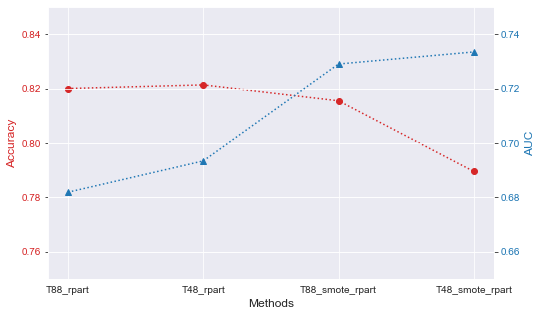

In [532]:
df1_Results['methods']=df1_Results.index


fig, ax1= plt.subplots(figsize=(8,5))
color = 'tab:red'
ax1.set_xlabel('methods')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(df1_Results.loc[:,'methods'], df1_Results.loc[:,'Accuracy'],marker='o', color=color,label="Acurracy", linestyle=":")
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0.75,0.85])
ax1.set_ylabel('Accuracy',fontsize=12)
ax1.set_xlabel('Methods',fontsize=12)


ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('AUC', color=color)  
ax2.plot(df1_Results.loc[:,'methods'], df1_Results.loc[:,'AUC'], marker='^',color=color,label="AUC", linestyle=":")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0.65,0.75])
ax2.set_ylabel('AUC',fontsize=12)

plt.show()


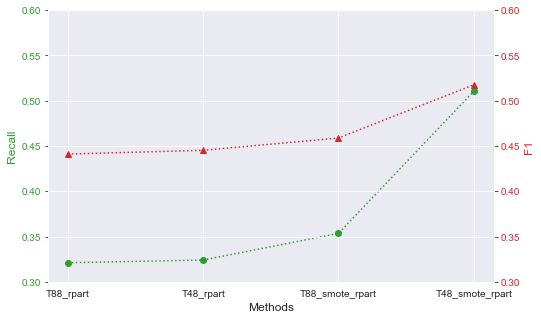

In [531]:
fig, ax3= plt.subplots(figsize=(8,5))

color = 'tab:green'
ax3.set_xlabel('methods')
ax3.set_ylabel('Recall', color=color)
ax3.plot(df1_Results.loc[:,'methods'], df1_Results.loc[:,'Recall'],marker='o', color=color,label="Recall", linestyle=":")
ax3.tick_params(axis='y', labelcolor=color)
ax3.set_ylim([0.30,0.60])
ax3.set_ylabel('Recall',fontsize=12)
ax3.set_xlabel('Methods',fontsize=12)


ax4 = ax3.twinx()  

color = 'tab:red'
ax4.set_ylabel('F1', color=color)  
ax4.plot(df1_Results.loc[:,'methods'], df1_Results.loc[:,'F1'], marker='^',color=color,label="F1", linestyle=":")
ax4.tick_params(axis='y', labelcolor=color)
ax4.set_ylim([0.30,0.60])
ax4.set_ylabel('F1',fontsize=12)

plt.show()

#we choose df_rpart_smote as our model. this model is stable and the metric values are good

In [549]:
##3.3 LogitBoost algorithm
LogBoost=pd.read_csv("/Users/jingjingsun/Desktop/lg_final.csv")
LogBoost=LogBoost.drop(LogBoost.columns[0],1)
LogBoost



,methods,OutLoop_No,Accuracy,Recall,F1,AUC,Acc_BestTune,ROC_BestTune
0,T88_lgBoost,1,0.801500,0.299925,0.400604,0.705282,41,51
1,T88_lgBoost,2,0.808833,0.381311,0.468736,0.705721,11,11
2,T88_lgBoost,3,0.803833,0.340618,0.434407,0.700959,11,11
3,T88_lgBoost,4,0.799333,0.307460,0.403960,0.704811,11,41
4,T88_lgBoost,5,0.805333,0.321778,0.422354,0.698154,21,41
5,T48_lgBoost,1,0.817833,0.308214,0.428048,0.716284,21,41
6,T48_lgBoost,2,0.798333,0.366240,0.445463,0.697442,41,51
7,T48_lgBoost,3,0.812000,0.388847,0.477778,0.694622,31,51
8,T48_lgBoost,4,0.798333,0.366240,0.445463,0.697442,51,51
9,T48_lgBoost,5,0.816167,0.298417,0.417942,0.718292,21,51


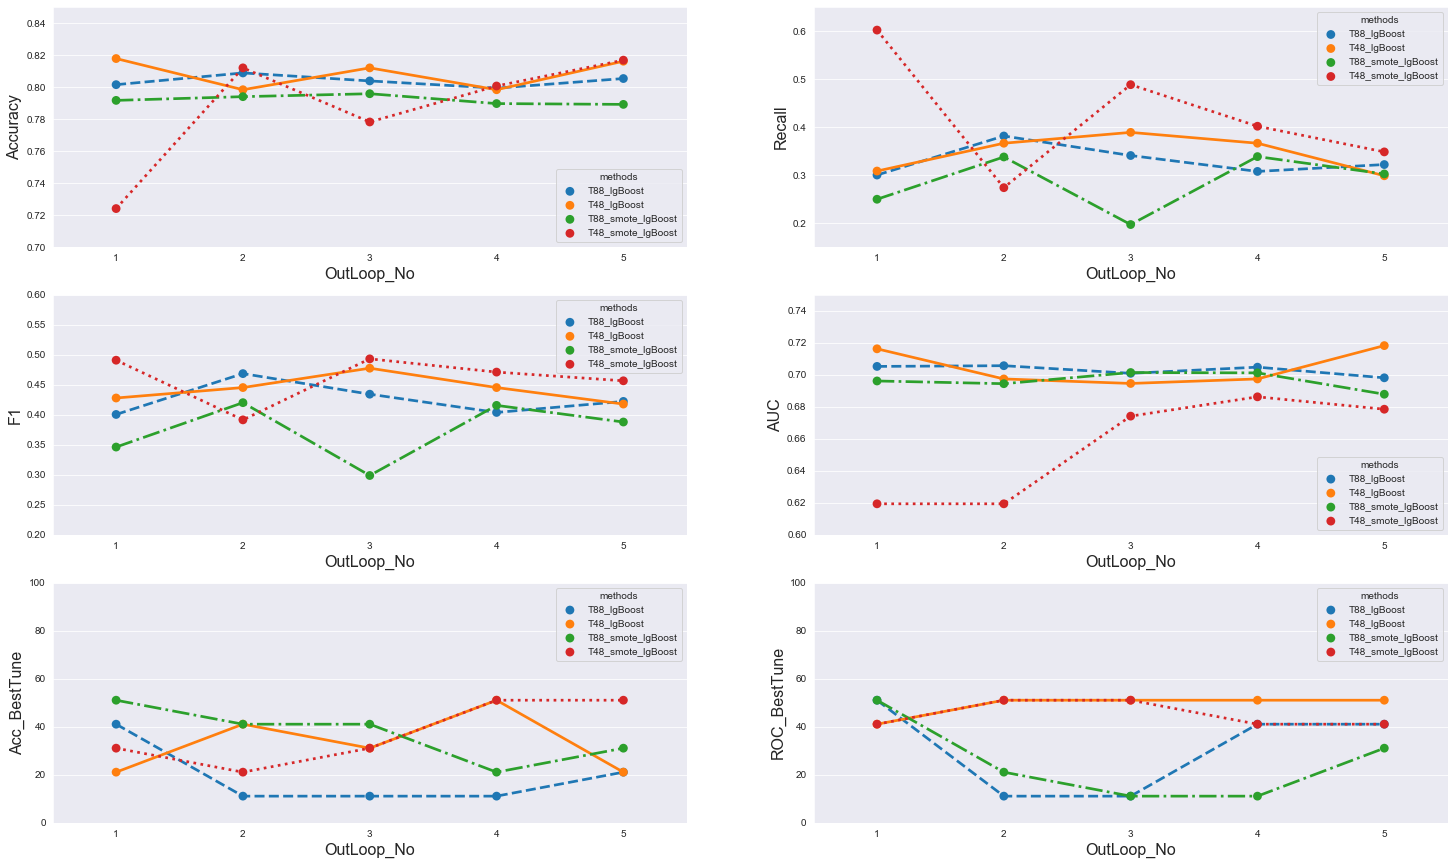

In [550]:
fig, ((axe1, axe2),(axe3,axe4),(axe5,axe6)) = plt.subplots(nrows=3, ncols=2,figsize=(25,15))
axen=[axe1,axe2,axe3,axe4,axe5,axe6]
linestyles=['--','-','-.',':']
for i in range(0,6):
    sns.catplot(x='OutLoop_No',y=LogBoost.columns[i+2],hue='methods',data=LogBoost,kind="point",ax=axen[i],height=10,linestyles=linestyles)
    axen[i].set_ylabel(LogBoost.columns[i+2],fontsize=16)
    axen[i].set_xlabel("OutLoop_No",fontsize=16)
    axe1.set_ylim([0.70,0.85])
    axe2.set_ylim([0.15,0.65])
    axe3.set_ylim([0.20,0.60])
    axe4.set_ylim([0.60,0.75])
    axe5.set_ylim([0,100])
    axe6.set_ylim([0,100])
for i in range(0,6):
    plt.close(i+2)
plt.show()


In [551]:
##metrics median for each methods

df2=LogBoost.drop(LogBoost.columns[[6,7]],1)

methods=df2.methods.unique()
colnames=df2.columns[range(2,6)]
Results2=pd.DataFrame(columns=colnames,index=methods)

for md in methods:
    for col in colnames:
        Results2.loc[md,col]=df2.loc[df2.iloc[:,0]==md,col].median()
Results2.columns=['Median_Acc',"Median_Recall","Median_F1","Median_AUC"]        
Results2


,Median_Acc,Median_Recall,Median_F1,Median_AUC
T88_lgBoost,0.803833,0.321778,0.422354,0.704811
T48_lgBoost,0.812,0.36624,0.445463,0.697442
T88_smote_lgBoost,0.791667,0.302185,0.388002,0.696167
T48_smote_lgBoost,0.800667,0.401658,0.471264,0.674179


In [552]:
#### caculate the distance from each loops data to median values
df2_med=df2.iloc[:,range(6)]
df2_med['Acc_dist']=0
df2_med['Recall_dist']=0
df2_med['F1_dist']=0
df2_med['Roc_dist']=0
df2_med['dist']=0
for ind in Results2.index:
    df2_med.loc[df2_med.methods==ind,'Acc_dist']=df2_med.loc[df2_med.methods==ind,'Accuracy']-Results2.loc[ind,'Median_Acc']
    df2_med.loc[df2_med.methods==ind,'Recall_dist']=df2_med.loc[df2_med.methods==ind,'Recall']-Results2.loc[ind,'Median_Recall']
    df2_med.loc[df2_med.methods==ind,'F1_dist']=df2_med.loc[df2_med.methods==ind,'F1']-Results2.loc[ind,'Median_F1']
    df2_med.loc[df2_med.methods==ind,'Roc_dist']=df2_med.loc[df2_med.methods==ind,'AUC']-Results2.loc[ind,'Median_AUC']
for i in range(20):
    df2_med.iloc[i,10]=math.sqrt(df2_med.iloc[i,6]**2+df2_med.iloc[i,7]**2+df2_med.iloc[i,8]**2+df2_med.iloc[i,9]**2)
                                                
df2_med

,methods,OutLoop_No,Accuracy,Recall,F1,AUC,Acc_dist,Recall_dist,F1_dist,Roc_dist,dist
0,T88_lgBoost,1,0.801500,0.299925,0.400604,0.705282,-0.002333,-0.021854,-0.021750,0.000471,0.030925
1,T88_lgBoost,2,0.808833,0.381311,0.468736,0.705721,0.005000,0.059533,0.046381,0.000911,0.075639
2,T88_lgBoost,3,0.803833,0.340618,0.434407,0.700959,0.000000,0.018839,0.012052,-0.003852,0.022694
3,T88_lgBoost,4,0.799333,0.307460,0.403960,0.704811,-0.004500,-0.014318,-0.018394,0.000000,0.023740
4,T88_lgBoost,5,0.805333,0.321778,0.422354,0.698154,0.001500,0.000000,0.000000,-0.006657,0.006824
5,T48_lgBoost,1,0.817833,0.308214,0.428048,0.716284,0.005833,-0.058026,-0.017415,0.018842,0.063713
6,T48_lgBoost,2,0.798333,0.366240,0.445463,0.697442,-0.013667,0.000000,0.000000,0.000000,0.013667
7,T48_lgBoost,3,0.812000,0.388847,0.477778,0.694622,0.000000,0.022607,0.032315,-0.002820,0.039539
8,T48_lgBoost,4,0.798333,0.366240,0.445463,0.697442,-0.013667,0.000000,0.000000,0.000000,0.013667
9,T48_lgBoost,5,0.816167,0.298417,0.417942,0.718292,0.004167,-0.067822,-0.027521,0.020850,0.076219


In [553]:
df2_Results=Results2.copy(deep=True)
df2_Results.columns=['Accuracy','Recall','F1','AUC']
df2_Results['OutLoop_No']=0
df2_Results.loc["T88_lgBoost",:]=df2_med.iloc[df2_med.loc[df2_med.methods=="T88_lgBoost",'dist'].idxmin(),range(1,6)]
df2_Results.loc["T48_lgBoost",:]=df2_med.iloc[df2_med.loc[df2_med.methods=="T48_lgBoost",'dist'].idxmin(),range(1,6)]
df2_Results.loc["T88_smote_lgBoost",:]=df2_med.iloc[df2_med.loc[df2_med.methods=="T88_smote_lgBoost",'dist'].idxmin(),range(1,6)]
df2_Results.loc["T48_smote_lgBoost",:]=df2_med.iloc[df2_med.loc[df2_med.methods=="T48_smote_lgBoost",'dist'].idxmin(),range(1,6)]
df2_Results

,Accuracy,Recall,F1,AUC,OutLoop_No
T88_lgBoost,0.805333,0.321778,0.422354,0.698154,5
T48_lgBoost,0.798333,0.36624,0.445463,0.697442,2
T88_smote_lgBoost,0.789167,0.302185,0.388002,0.687879,5
T48_smote_lgBoost,0.800667,0.401658,0.471264,0.686258,4


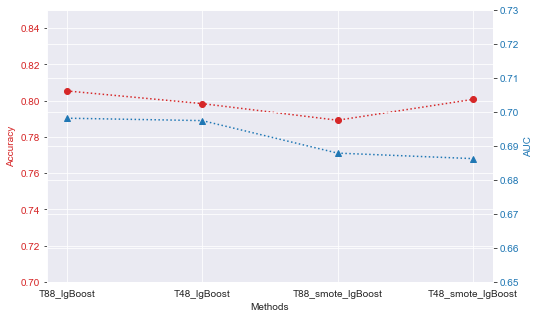

In [554]:
df2_Results['methods']=df2_Results.index


fig, ax1= plt.subplots(figsize=(8,5))
color = 'tab:red'
ax1.set_xlabel('methods')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(df2_Results.loc[:,'methods'], df2_Results.loc[:,'Accuracy'],marker='o', color=color,label="Acurracy", linestyle=":")
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0.70,0.85])
ax1.set_ylabel('Accuracy',fontsize=10)
ax1.set_xlabel('Methods',fontsize=10)


ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('AUC', color=color)  
ax2.plot(df2_Results.loc[:,'methods'], df2_Results.loc[:,'AUC'], marker='^',color=color,label="AUC", linestyle=":")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0.65,0.73])
ax2.set_ylabel('AUC',fontsize=10)

plt.show()

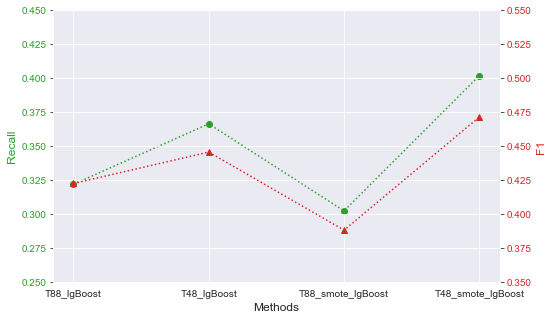

In [556]:
fig, ax3= plt.subplots(figsize=(8,5))

color = 'tab:green'
ax3.set_xlabel('methods')
ax3.set_ylabel('Recall', color=color)
ax3.plot(df2_Results.loc[:,'methods'], df2_Results.loc[:,'Recall'],marker='o', color=color,label="F1", linestyle=":")
ax3.tick_params(axis='y', labelcolor=color)
ax3.set_ylim([0.25,0.45])
ax3.set_ylabel('Recall',fontsize=12)
ax3.set_xlabel('Methods',fontsize=12)


ax4 = ax3.twinx()  

color = 'tab:red'
ax4.set_ylabel('F1', color=color)  
ax4.plot(df2_Results.loc[:,'methods'], df2_Results.loc[:,'F1'], marker='^',color=color,label="F1", linestyle=":")
ax4.tick_params(axis='y', labelcolor=color)
ax4.set_ylim([0.35,0.55])
ax4.set_ylabel('F1',fontsize=12)

plt.show()
##we choose df2_logBoost as the model 

In [564]:
##3.4 glmnet (Lasso and Elastic-Net Regularized Generalized Linear Models)
glmnet=pd.read_csv("/Users/jingjingsun/Desktop/net_final.csv")
glmnet=glmnet.drop(glmnet.columns[0],1)
glmnet


,methods,OutLoop_No,Accuracy,Recall,F1,AUC,Acc_BestTune1,Acc_BestTune2,ROC_BestTune1,ROC_BestTune2
0,T88_net,1,0.824500,0.361718,0.476900,0.777777,0.550,0.000630,0.100,0.013578
1,T88_net,2,0.824833,0.363979,0.478929,0.777352,0.550,0.000136,0.100,0.013634
2,T88_net,3,0.824667,0.360211,0.476096,0.776924,0.775,0.000627,0.100,0.013506
3,T88_net,4,0.824000,0.363225,0.477228,0.778719,0.775,0.000640,0.100,0.013782
4,T88_net,5,0.823000,0.356443,0.471116,0.774195,0.325,0.000137,0.100,0.013676
5,T48_net,1,0.824833,0.361718,0.477374,0.764846,0.100,0.000630,0.100,0.013578
6,T48_net,2,0.824167,0.361718,0.476427,0.764649,1.000,0.000136,0.100,0.013634
7,T48_net,3,0.824000,0.357950,0.473579,0.764861,0.100,0.000627,0.325,0.013506
8,T48_net,4,0.823000,0.360211,0.473736,0.765225,0.775,0.000640,0.100,0.063969
9,T48_net,5,0.822833,0.354936,0.469825,0.763214,0.550,0.000137,0.100,0.013676


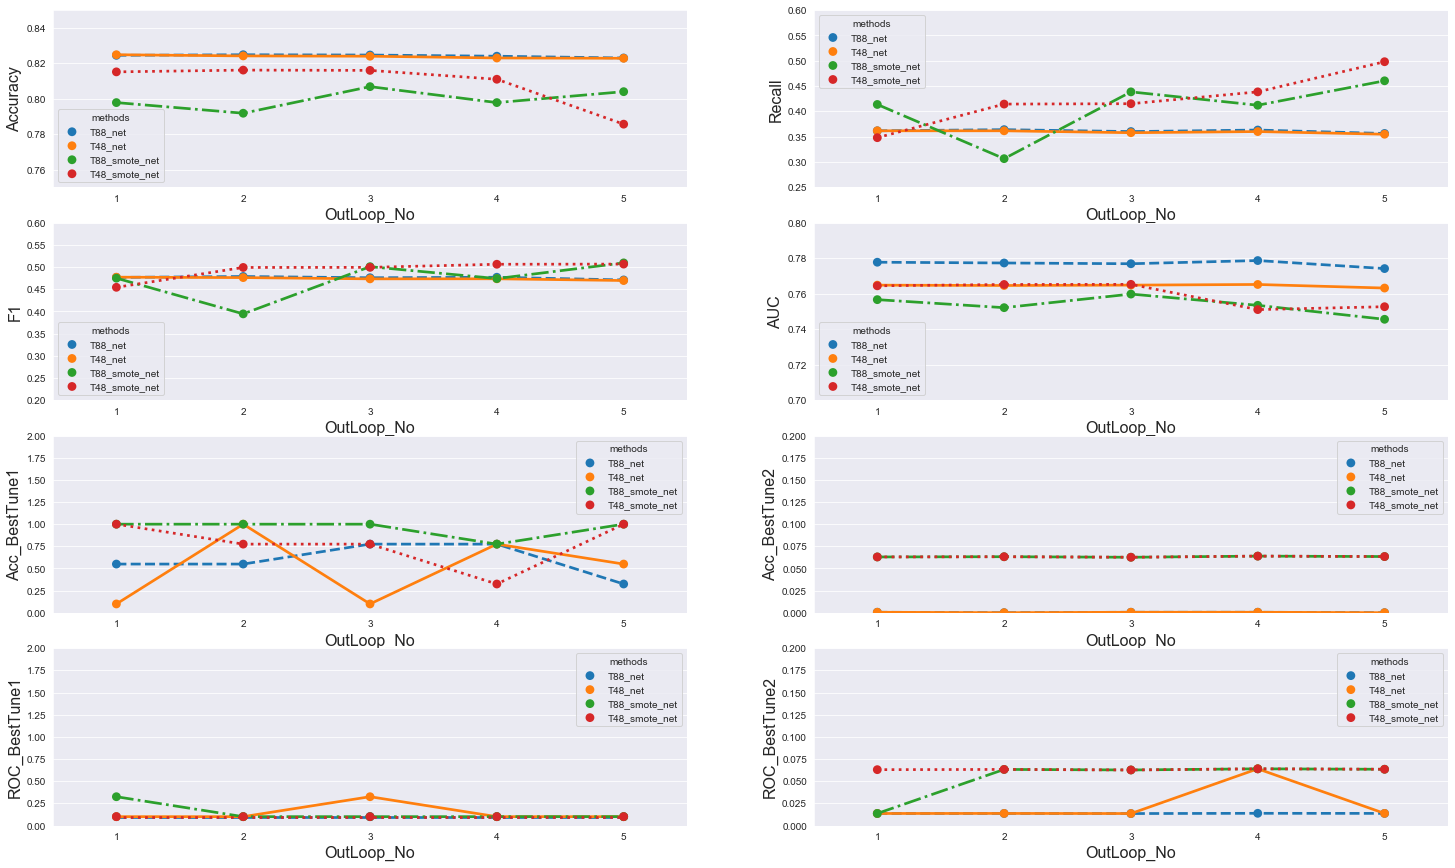

In [565]:
fig, ((axe1, axe2),(axe3,axe4),(axe5,axe6),(axe7,axe8)) = plt.subplots(nrows=4, ncols=2,figsize=(25,15))
axen=[axe1,axe2,axe3,axe4,axe5,axe6,axe7,axe8]
linestyles=['--','-','-.',':']
for i in range(0,8):
    sns.catplot(x='OutLoop_No',y=glmnet.columns[i+2],hue='methods',data=glmnet,kind="point",ax=axen[i],height=10,linestyles=linestyles)
    axen[i].set_ylabel(glmnet.columns[i+2],fontsize=16)
    axen[i].set_xlabel("OutLoop_No",fontsize=16)
    axe1.set_ylim([0.75,0.85])
    axe2.set_ylim([0.25,0.60])
    axe3.set_ylim([0.20,0.60])
    axe4.set_ylim([0.70,0.80])
    axe5.set_ylim([0,2.0])
    axe6.set_ylim([0,0.2])
    axe7.set_ylim([0,2.0])
    axe8.set_ylim([0,0.2])
for i in range(0,8):
    plt.close(i+2)
plt.show()

In [566]:
##metrics median for each methods

df3=glmnet.drop(glmnet.columns[[6,7]],1)

methods=df3.methods.unique()
colnames=df3.columns[range(2,6)]
Results3=pd.DataFrame(columns=colnames,index=methods)

for md in methods:
    for col in colnames:
        Results3.loc[md,col]=df3.loc[df3.iloc[:,0]==md,col].median()
Results3.columns=['Median_Acc',"Median_Recall","Median_F1","Median_AUC"]       
Results3

,Median_Acc,Median_Recall,Median_F1,Median_AUC
T88_net,0.8245,0.361718,0.4769,0.777352
T48_net,0.824,0.360211,0.473736,0.764846
T88_smote_net,0.797833,0.413715,0.475119,0.753461
T48_smote_net,0.815167,0.415222,0.499547,0.764474


In [567]:
#### caculate the distance from each loops data to median values
df3_med=df3.iloc[:,range(6)]
df3_med['Acc_dist']=0
df3_med['Recall_dist']=0
df3_med['F1_dist']=0
df3_med['Roc_dist']=0
df3_med['dist']=0
for ind in Results3.index:
    df3_med.loc[df3_med.methods==ind,'Acc_dist']=df3_med.loc[df3_med.methods==ind,'Accuracy']-Results3.loc[ind,'Median_Acc']
    df3_med.loc[df3_med.methods==ind,'Recall_dist']=df3_med.loc[df3_med.methods==ind,'Recall']-Results3.loc[ind,'Median_Recall']
    df3_med.loc[df3_med.methods==ind,'F1_dist']=df3_med.loc[df3_med.methods==ind,'F1']-Results3.loc[ind,'Median_F1']
    df3_med.loc[df3_med.methods==ind,'Roc_dist']=df3_med.loc[df3_med.methods==ind,'AUC']-Results3.loc[ind,'Median_AUC']
for i in range(20):
    df3_med.iloc[i,10]=math.sqrt(df3_med.iloc[i,6]**2+df3_med.iloc[i,7]**2+df3_med.iloc[i,8]**2+df3_med.iloc[i,9]**2)
                                                
df3_med

,methods,OutLoop_No,Accuracy,Recall,F1,AUC,Acc_dist,Recall_dist,F1_dist,Roc_dist,dist
0,T88_net,1,0.824500,0.361718,0.476900,0.777777,0.000000,0.000000,0.000000,0.000426,0.000426
1,T88_net,2,0.824833,0.363979,0.478929,0.777352,0.000333,0.002261,0.002029,0.000000,0.003056
2,T88_net,3,0.824667,0.360211,0.476096,0.776924,0.000167,-0.001507,-0.000805,-0.000428,0.001769
3,T88_net,4,0.824000,0.363225,0.477228,0.778719,-0.000500,0.001507,0.000328,0.001367,0.002121
4,T88_net,5,0.823000,0.356443,0.471116,0.774195,-0.001500,-0.005275,-0.005785,-0.003157,0.008573
5,T48_net,1,0.824833,0.361718,0.477374,0.764846,0.000833,0.001507,0.003638,0.000000,0.004025
6,T48_net,2,0.824167,0.361718,0.476427,0.764649,0.000167,0.001507,0.002690,-0.000197,0.003095
7,T48_net,3,0.824000,0.357950,0.473579,0.764861,0.000000,-0.002261,-0.000157,0.000015,0.002266
8,T48_net,4,0.823000,0.360211,0.473736,0.765225,-0.001000,0.000000,0.000000,0.000378,0.001069
9,T48_net,5,0.822833,0.354936,0.469825,0.763214,-0.001167,-0.005275,-0.003911,-0.001633,0.006866


In [569]:
#distiance results
df3_Results=Results3.copy(deep=True)
df3_Results.columns=['Accuracy','Recall','F1','AUC']
df3_Results['OutLoop_No']=0
df3_Results.loc["T88_net",:]=df3_med.iloc[df3_med.loc[df3_med.methods=="T88_net",'dist'].idxmin(),range(1,6)]
df3_Results.loc["T48_net",:]=df3_med.iloc[df3_med.loc[df3_med.methods=="T48_net",'dist'].idxmin(),range(1,6)]
df3_Results.loc["T88_smote_net",:]=df3_med.iloc[df3_med.loc[df3_med.methods=="T88_smote_net",'dist'].idxmin(),range(1,6)]
df3_Results.loc["T48_smote_net",:]=df3_med.iloc[df3_med.loc[df3_med.methods=="T48_smote_net",'dist'].idxmin(),range(1,6)]
df3_Results

,Accuracy,Recall,F1,AUC,OutLoop_No
T88_net,0.8245,0.361718,0.4769,0.777777,1
T48_net,0.823,0.360211,0.473736,0.765225,4
T88_smote_net,0.797833,0.412208,0.474209,0.753461,4
T48_smote_net,0.816,0.415222,0.499547,0.765296,3


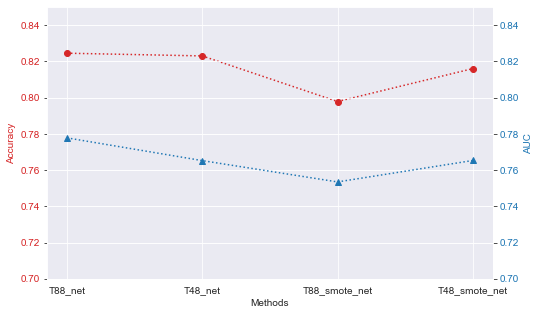

In [570]:
df3_Results['methods']=df3_Results.index


fig, ax1= plt.subplots(figsize=(8,5))
color = 'tab:red'
ax1.set_xlabel('methods')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(df3_Results.loc[:,'methods'], df3_Results.loc[:,'Accuracy'],marker='o', color=color,label="Acurracy", linestyle=":")
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0.70,0.85])
ax1.set_ylabel('Accuracy',fontsize=10)
ax1.set_xlabel('Methods',fontsize=10)


ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('AUC', color=color)  
ax2.plot(df3_Results.loc[:,'methods'], df3_Results.loc[:,'AUC'], marker='^',color=color,label="AUC", linestyle=":")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0.70,0.85])
ax2.set_ylabel('AUC',fontsize=10)

plt.show()

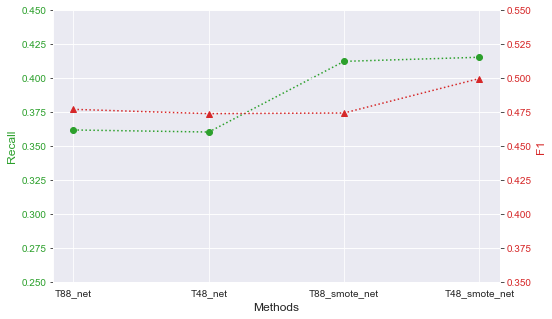

In [571]:
fig, ax3= plt.subplots(figsize=(8,5))

color = 'tab:green'
ax3.set_xlabel('methods')
ax3.set_ylabel('Recall', color=color)
ax3.plot(df3_Results.loc[:,'methods'], df3_Results.loc[:,'Recall'],marker='o', color=color,label="F1", linestyle=":")
ax3.tick_params(axis='y', labelcolor=color)
ax3.set_ylim([0.25,0.45])
ax3.set_ylabel('Recall',fontsize=12)
ax3.set_xlabel('Methods',fontsize=12)


ax4 = ax3.twinx()  

color = 'tab:red'
ax4.set_ylabel('F1', color=color)  
ax4.plot(df3_Results.loc[:,'methods'], df3_Results.loc[:,'F1'], marker='^',color=color,label="F1", linestyle=":")
ax4.tick_params(axis='y', labelcolor=color)
ax4.set_ylim([0.35,0.55])
ax4.set_ylabel('F1',fontsize=12)

plt.show()
##we choose df_net for this algorithm.

In [573]:
## choose model from three methods
#df_rpart_smote, df2_logBoost, df_net
NaiveB=df4_Results.loc[df4_Results.index=="T48_smote_NaiveBayes",:]
rpart=df1_Results.loc[df1_Results.index=='T88_smote_rpart',:]
lgboost=df2_Results.loc[df2_Results.index=="T48_lgBoost",:]
net=df3_Results.loc[df3_Results.index=="T48_smote_net",:]
compare=pd.DataFrame(NaiveB)
compare=compare.append(rpart)
compare=compare.append(lgboost)
compare=compare.append(net)
compare

,Accuracy,Recall,F1,AUC,OutLoop_No,methods
T48_smote_NaiveBayes,0.799167,0.168048,0.270139,0.754076,1,T48_smote_NaiveBayes
T88_smote_rpart,0.8155,0.353429,0.45868,0.729019,3,T88_smote_rpart
T48_lgBoost,0.798333,0.36624,0.445463,0.697442,2,T48_lgBoost
T48_smote_net,0.816,0.415222,0.499547,0.765296,3,T48_smote_net


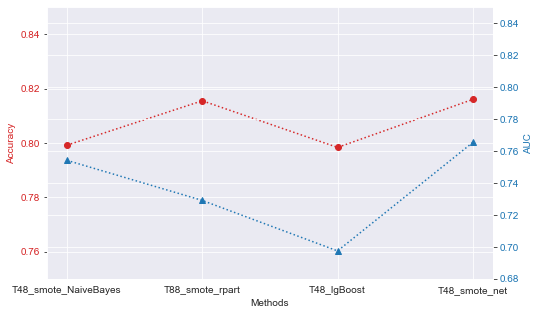

In [574]:
fig, ax1= plt.subplots(figsize=(8,5))
color = 'tab:red'
ax1.set_xlabel('methods')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(compare.loc[:,'methods'], compare.loc[:,'Accuracy'],marker='o', color=color,label="Acurracy", linestyle=":")
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0.75,0.85])
ax1.set_ylabel('Accuracy',fontsize=10)
ax1.set_xlabel('Methods',fontsize=10)


ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('AUC', color=color)  
ax2.plot(compare.loc[:,'methods'], compare.loc[:,'AUC'], marker='^',color=color,label="AUC", linestyle=":")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0.68,0.85])
ax2.set_ylabel('AUC',fontsize=10)

plt.show()

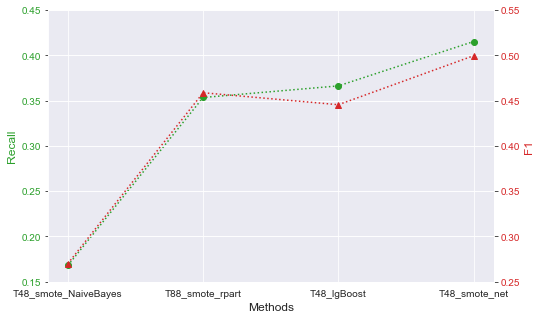

In [575]:
fig, ax3= plt.subplots(figsize=(8,5))

color = 'tab:green'
ax3.set_xlabel('methods')
ax3.set_ylabel('Recall', color=color)
ax3.plot(compare.loc[:,'methods'], compare.loc[:,'Recall'],marker='o', color=color,label="F1", linestyle=":")
ax3.tick_params(axis='y', labelcolor=color)
ax3.set_ylim([0.15,0.45])
ax3.set_ylabel('Recall',fontsize=12)
ax3.set_xlabel('Methods',fontsize=12)


ax4 = ax3.twinx()  

color = 'tab:red'
ax4.set_ylabel('F1', color=color)  
ax4.plot(compare.loc[:,'methods'], compare.loc[:,'F1'], marker='^',color=color,label="F1", linestyle=":")
ax4.tick_params(axis='y', labelcolor=color)
ax4.set_ylim([0.25,0.55])
ax4.set_ylabel('F1',fontsize=12)

plt.show()

In [660]:
#4. Unsupervised learning (clustering)
##4.1 plot clusters in a 2-Dimensional plot 
###4.1.1 PCA 2-D plot
df_2D=df_scale.copy(deep=True)
pca_2D=df_2D.drop("DEFAULT",1).values
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pca_2D)

In [661]:
df_2D['pca-one'] = pca_result[:,0]
df_2D['pca-two'] = pca_result[:,1] 

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.3163916  0.15328045]


In [662]:
np.random.seed(42)
rndperm = np.random.permutation(df_2D.shape[0])

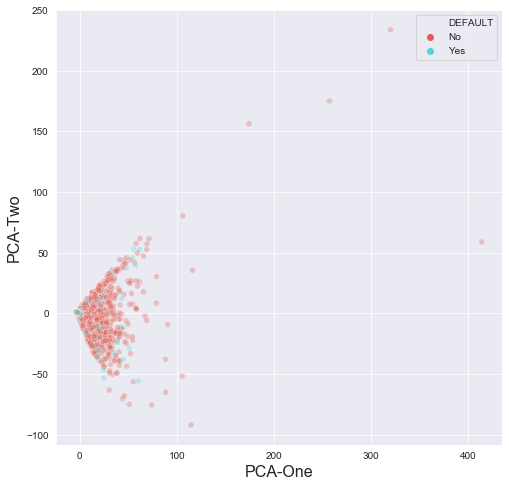

In [663]:
####(1) True DEFAULT data plotting

plt.figure(figsize=(8,8))
ax=sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="DEFAULT",
    palette=sns.color_palette("hls", 2),
    data=df_2D.loc[rndperm,:],
    legend="full",
    alpha=0.3
)
current_handles, current_labels=ax.get_legend_handles_labels()
ax.legend(current_handles,['DEFAULT','No','Yes'],loc='upper right',prop={'size': 10})
ax.set_ylabel("PCA-Two",fontsize=16)
ax.set_xlabel("PCA-One",fontsize=16)
plt.show()

In [581]:
####(2) K-Means clustering results (K=2) on PCA 2-dimensional plot
df_2D=df_scale.copy(deep=True)
km_X=df_2D.drop("DEFAULT",1).values
km = KMeans(n_clusters=2, random_state=0)
km.fit(km_X)
est_y = km.predict(km_X)

In [582]:
df_2D['pca-one'] = pca_result[:,0]
df_2D['pca-two'] = pca_result[:,1] 


In [583]:
est_y[np.where(est_y==1)]=2
est_y[np.where(est_y==0)]=1
est_y[np.where(est_y==2)]=0

df_2D["est_y"]=est_y

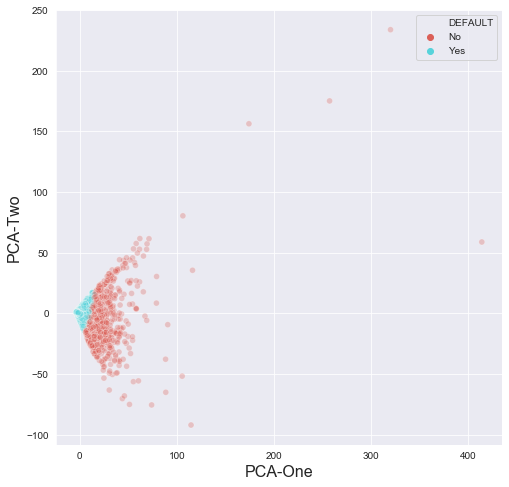

In [588]:
#### plotting results
plt.figure(figsize=(8,8))
ax=sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="est_y",
    palette=sns.color_palette("hls", 2),
    data=df_2D.loc[rndperm,:],
    legend="full",
    alpha=0.3
)
current_handles, current_labels=ax.get_legend_handles_labels()
ax.legend(current_handles,['DEFAULT', 'No', 'Yes'],loc='upper right',prop={'size': 10})
ax.set_ylabel("PCA-Two",fontsize=16)
ax.set_xlabel("PCA-One",fontsize=16)
plt.show()

In [814]:
##4.1.2 T-Distributed Stochastic Neighbouring Entities (t-SNE)plot
df_2D=df_scale.copy(deep=True)
tsne_2D=df_2D.drop("DEFAULT",1).values
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=250)
tsne_results = tsne.fit_transform(tsne_2D)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.148s...
[t-SNE] Computed neighbors for 30000 samples in 94.293s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for s

In [815]:
df_2D=df_scale.copy(deep=True)
km_X=df_2D.drop("DEFAULT",1).values
km = KMeans(n_clusters=2, random_state=0)
km.fit(km_X)
est_y = km.predict(km_X)

In [816]:
df_2D['tsne-2d-one'] = tsne_results[:,0]
df_2D['tsne-2d-two'] = tsne_results[:,1]
df_2D['est_y']=est_y

In [817]:
np.random.seed(42)
rndperm = np.random.permutation(df_2D.shape[0])

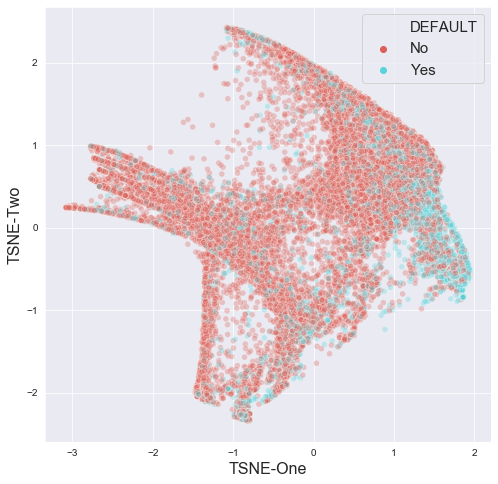

In [818]:
####(1)True DEFAULT data 
plt.figure(figsize=(8,8))
ax=sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="DEFAULT",
    palette=sns.color_palette("hls", 2),
    data=df_2D,
    legend="full",
    alpha=0.3
)
current_handles, current_labels=ax.get_legend_handles_labels()
ax.legend(current_handles,['DEFAULT', 'No', 'Yes'],loc='upper right',prop={'size': 15})
ax.set_ylabel("TSNE-Two",fontsize=16)
ax.set_xlabel("TSNE-One",fontsize=16)
plt.show()

In [801]:
np.random.seed(33)
rndperm = np.random.permutation(df_2D.shape[0])

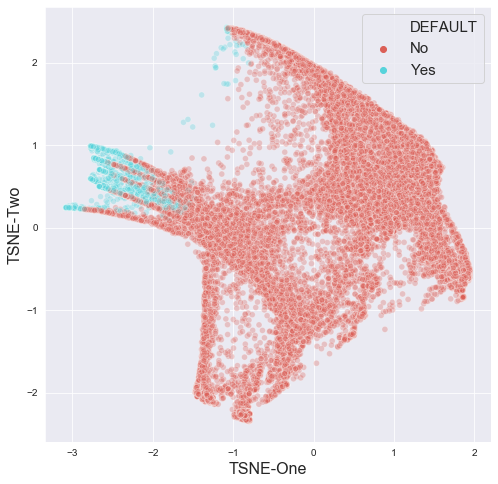

In [819]:
####(2) K-Means (K=2) clustering results 
plt.figure(figsize=(8,8))
ax=sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="est_y",
    palette=sns.color_palette("hls", 2),
    data=df_2D,
    legend="full",
    alpha=0.3
)
current_handles, current_labels=ax.get_legend_handles_labels()
ax.legend(current_handles,['DEFAULT', 'No', 'Yes'],loc='upper right',prop={'size': 15})
ax.set_ylabel("TSNE-Two",fontsize=16)
ax.set_xlabel("TSNE-One",fontsize=16)
plt.show()


In [820]:
#4.2 K-Means (K=10) clustering results 
## removed the instances that having no default value
df_2D=df_scale.copy(deep=True)
df_2D=df_2D.drop(df_2D.loc[df_2D.DEFAULT==0,:].index,0)

In [821]:
km_X=df_2D.drop("DEFAULT",1)
km = KMeans(n_clusters=10, random_state=0)
kmfit=km.fit(km_X)
est_y = km.predict(km_X)

In [822]:
cluster_result=pd.DataFrame()
cluster_result=km_X
cluster_result["clusters"]=kmfit.labels_
results=pd.DataFrame(cluster_result["clusters"].value_counts().sort_index()).T
results['total']= results.values.sum()
results


,0,1,2,3,4,5,6,7,8,9,total
clusters,4847,289,27,20,6,40,64,1324,3,16,6636


In [825]:
tsne_2D=df_2D.drop("DEFAULT",1)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=250)
tsne_results = tsne.fit_transform(tsne_2D)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6636 samples in 0.016s...
[t-SNE] Computed neighbors for 6636 samples in 5.947s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6636
[t-SNE] Computed conditional probabilities for sample 2000 / 6636
[t-SNE] Computed conditional probabilities for sample 3000 / 6636
[t-SNE] Computed conditional probabilities for sample 4000 / 6636
[t-SNE] Computed conditional probabilities for sample 5000 / 6636
[t-SNE] Computed conditional probabilities for sample 6000 / 6636
[t-SNE] Computed conditional probabilities for sample 6636 / 6636
[t-SNE] Mean sigma: 1.040070
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.242798
[t-SNE] KL divergence after 251 iterations: 17976931348623157081452742373170435679807056752584499659891747680315726078002853876058955863276687817154045895351438246423432132688946418276846754670353751698604991057655128207624549009038932894407586850845513394230458323690322294816580855933212

In [826]:
df_2D['tsne-2d-one'] = tsne_results[:,0]
df_2D['tsne-2d-two'] = tsne_results[:,1]
df_2D["est_y"]=est_y

In [828]:
np.random.seed(34)
rndperm = np.random.permutation(df_2D.shape[0])

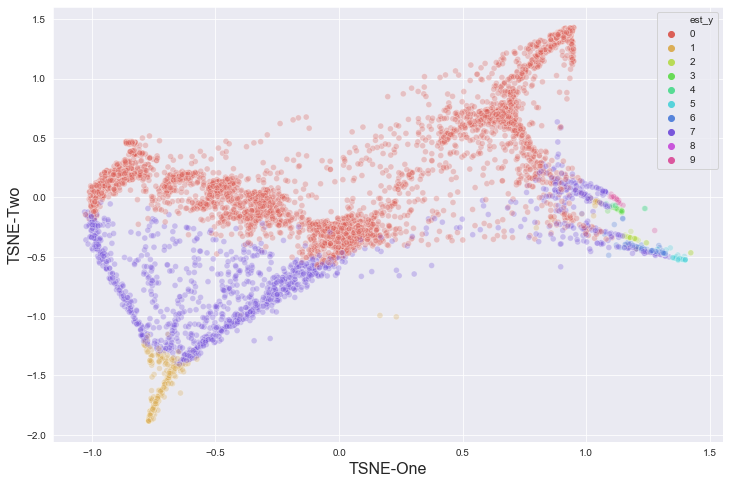

In [830]:
####4.2 plot 10 clusters on tsne_2-dimension plot
plt.figure(figsize=(12,8))
ax=sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="est_y",
    palette=sns.color_palette("hls", 10),
    data=df_2D,
    legend="full",
    alpha=0.3
)
ax.set_ylabel("TSNE-Two",fontsize=16)
ax.set_xlabel("TSNE-One",fontsize=16)
plt.show()
